<a href="https://colab.research.google.com/github/Jhon-Carvajal/Talento-tech/blob/main/Proyectof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML

C5

Nivel Integrador

OBJETIVO

El objetivo principal al trabajar con este dataset es identificar patrones y relaciones entre diferentes tipos de crímenes en contra de la mujer. haciendo uso de las técnicas de análisis y clustering para agrupar estados similares de crímenes.

Dataset tomado de ("https://www.kaggle.com/code/amankhan98/crimes-against-women-2001-2021/notebook")

CARGA DEL DATASET



*   State: Nombre del estado en India.
*  Year: Año del registro.
*   Rape: Número de casos de violación.
*  K&A: Casos de secuestro y abducción.
*   DD: Casos de dote.
*   AoW: Asalto a mujeres con intención de deshonrarlas.
*   AoM: Insultos a la modestia de las mujeres.
*   DV: Violencia doméstica.
*   WT: Tráfico de mujeres.

In [ ]:
!pip install --upgrade umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

import umap

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS


import random
import time

data = pd.read_csv("CrimesOnWomenData.csv")
# Mostrar las primeras filas del dataset
print(data.head())
std_figure_size = (8,5)

   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0


**GRAFICOS DE LAS COLUMNAS** **DEL** **DATASET**

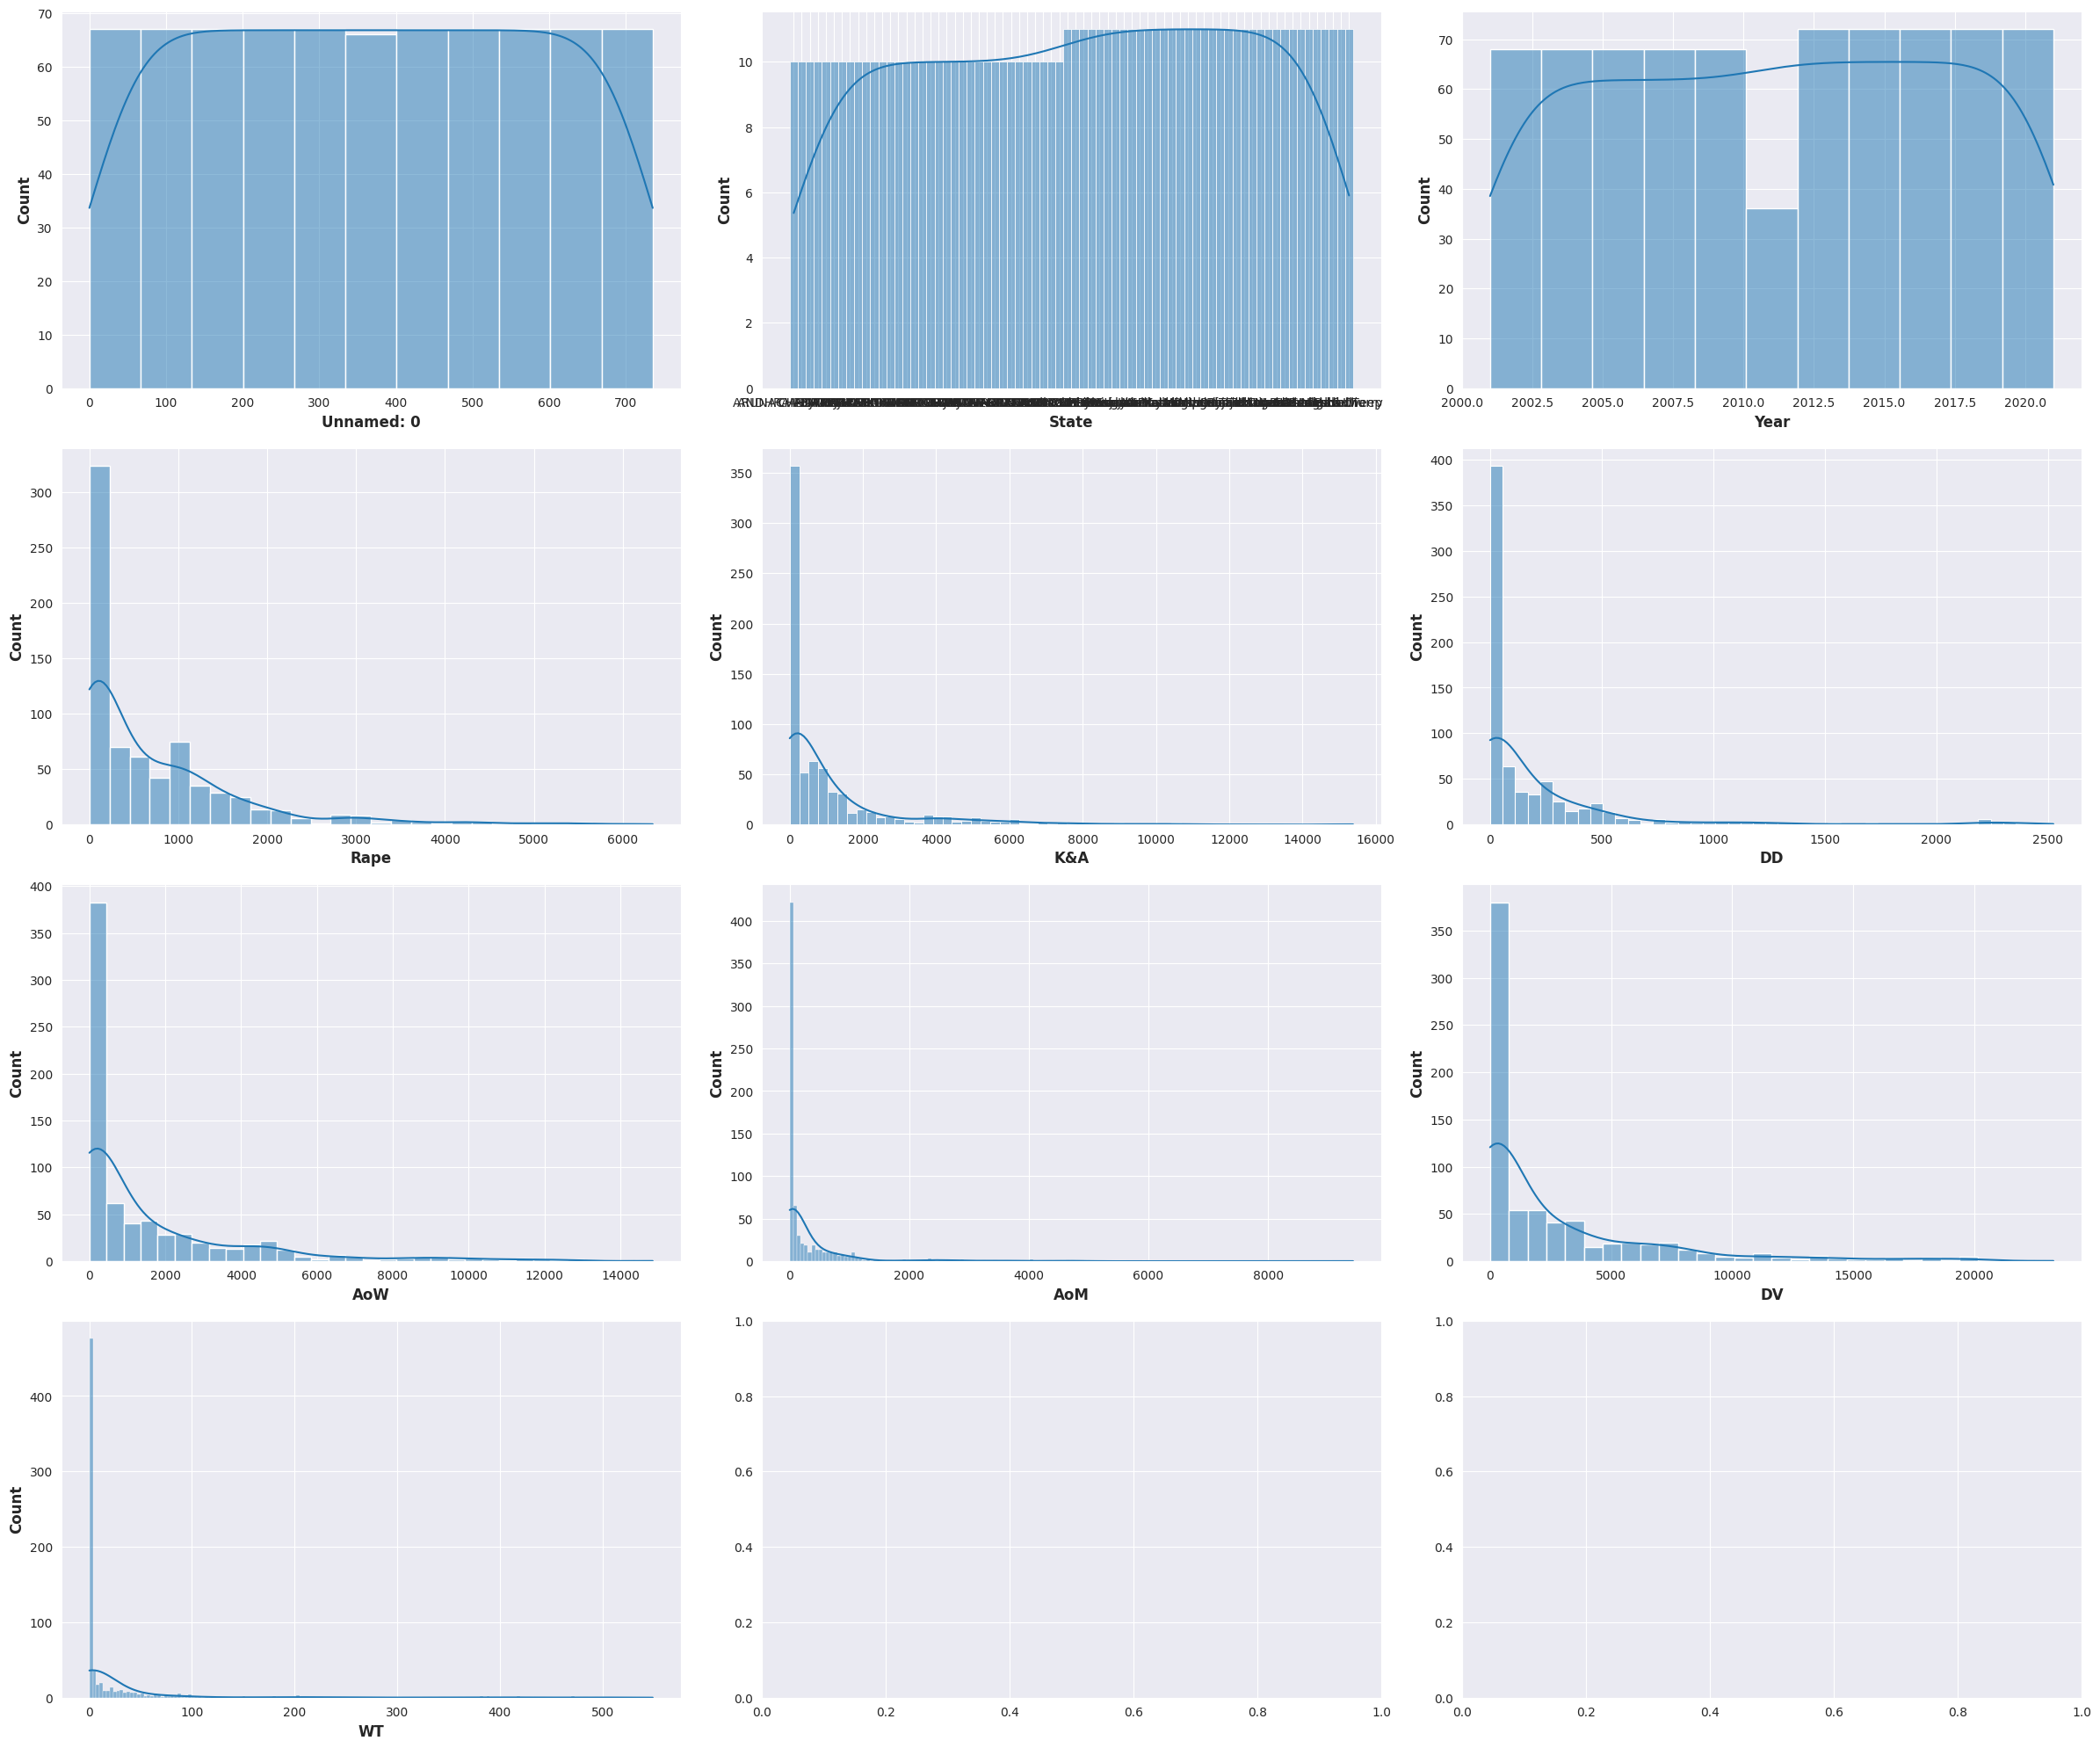

In [ ]:
# Establece el número de columnas deseado y el tamaño de las figuras
n_cols = 3
figsize = std_figure_size
n_rows = (len(data.columns) + n_cols - 1) // n_cols  # Calculo del número de filas

fig, axs = plt.subplots(n_rows, n_cols, figsize=(figsize[0] * n_cols, figsize[1] * n_rows))

# Itera sobre las columnas y las subplots
for i, col in enumerate(data.columns):
    row = i // n_cols
    col_idx = i % n_cols
    sns.histplot(data=data, x=col, kde=True, ax=axs[row, col_idx])

# Ajusta el layout para evitar solapamientos
plt.tight_layout()
plt.show()

**PRE**-**PROCESAMIENTO**

Descripción estadistica del dataset

In [ ]:
# Descripción estadística básica del dataset
print(data.describe())

       Unnamed: 0         Year         Rape           K&A           DD  \
count  736.000000   736.000000   736.000000    736.000000   736.000000   
mean   367.500000  2011.149457   727.855978   1134.542120   215.692935   
std    212.609188     6.053453   977.024945   1993.536828   424.927334   
min      0.000000  2001.000000     0.000000      0.000000     0.000000   
25%    183.750000  2006.000000    35.000000     24.750000     1.000000   
50%    367.500000  2011.000000   348.500000    290.000000    29.000000   
75%    551.250000  2016.000000  1069.000000   1216.000000   259.000000   
max    735.000000  2021.000000  6337.000000  15381.000000  2524.000000   

                AoW          AoM            DV          WT  
count    736.000000   736.000000    736.000000  736.000000  
mean    1579.115489   332.722826   2595.078804   28.744565  
std     2463.962518   806.024551   4042.004953   79.999660  
min        0.000000     0.000000      0.000000    0.000000  
25%       34.000000     3.00

In [ ]:
data.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


**Verificación de columnas duplicadas**

In [ ]:
n_dup = len(data) - len(data.drop_duplicates())

print(f"Columnas Duplicadas : {n_dup}")

Columnas Duplicadas : 0


**Limpieza de valores nulos,o datos no significativos**
*   Verificacion de valores null
*   Muestra del dataset limpio



In [ ]:
data1 = data.drop(columns=['Unnamed: 0','State'])
# Verificar si existen valores nulos en el dataset
null_values = data1.isnull().sum()
#valores nulos por columna
null_values

,0
Year,0
Rape,0
K&A,0
DD,0
AoW,0
AoM,0
DV,0
WT,0


Descripción de los tipos de datos

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    736 non-null    int64
 1   Rape    736 non-null    int64
 2   K&A     736 non-null    int64
 3   DD      736 non-null    int64
 4   AoW     736 non-null    int64
 5   AoM     736 non-null    int64
 6   DV      736 non-null    int64
 7   WT      736 non-null    int64
dtypes: int64(8)
memory usage: 46.1 KB


**Tabla de dataset CrimesOnWomenData**

En la siguinete tabla se muestran los datos de la información contenida en el dataset sin presencia de la columna unamed que no aportaba ningun aporte para analizar.

In [ ]:
data1

,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,2001,871,765,420,3544,2271,5791,7
1,2001,33,55,0,78,3,11,0
2,2001,817,1070,59,850,4,1248,0
3,2001,888,518,859,562,21,1558,83
4,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...
731,2021,1250,4083,141,2068,417,4731,4
732,2021,315,904,16,1851,10,501,1
733,2021,2,1,0,5,1,9,0
734,2021,0,0,0,1,1,3,0


**CORRELACIÓN**

Se usa este metodo para identificar la relación entre las variables para hacer una toma de decisión.

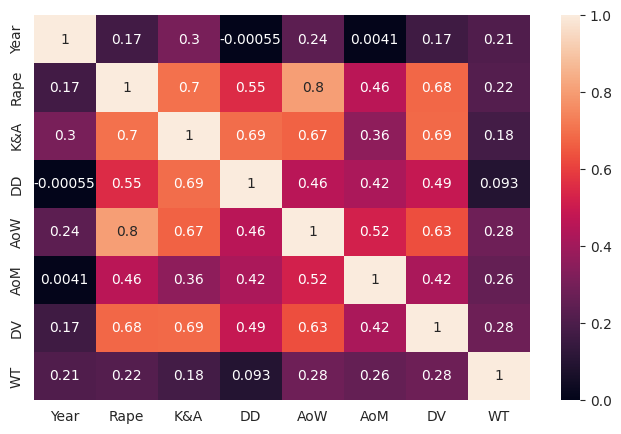

In [ ]:
correlacion = data1.corr(method='pearson')
plt.figure(figsize=std_figure_size)
sns.heatmap(correlacion, annot=True)
plt.show()

**Limpieza de los nombre de las columnas**

In [ ]:
cols_cleaned = []

for col in data1.columns:
    cols_cleaned.append(col.strip().lower())

data1.columns = cols_cleaned

# sanity check
data1.head()

,year,rape,k&a,dd,aow,aom,dv,wt
0,2001,871,765,420,3544,2271,5791,7
1,2001,33,55,0,78,3,11,0
2,2001,817,1070,59,850,4,1248,0
3,2001,888,518,859,562,21,1558,83
4,2001,959,171,70,1763,161,840,0


**Descripción grafica del dataset data1**

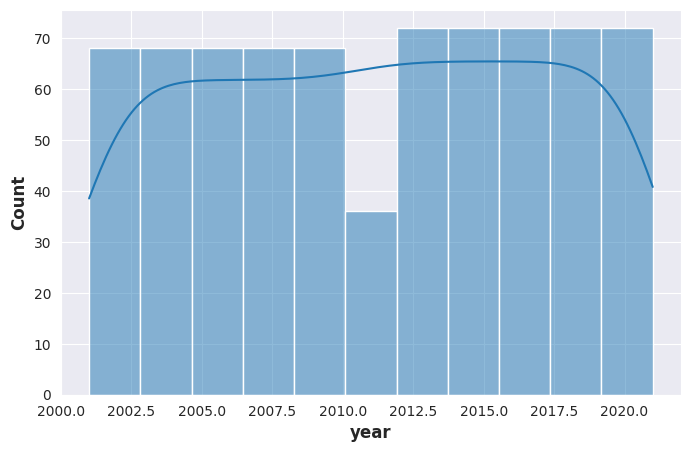

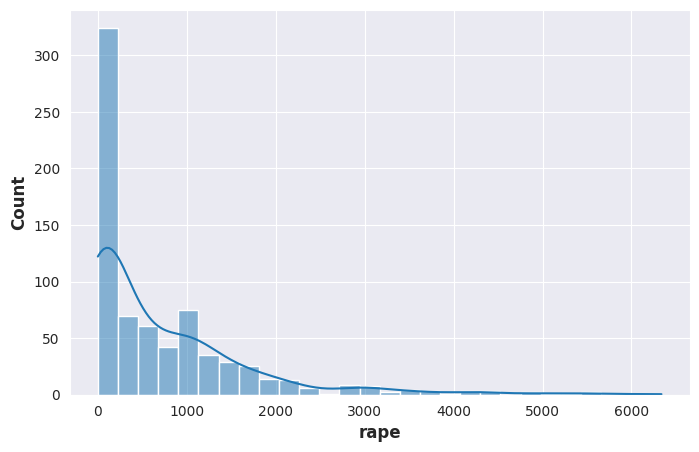

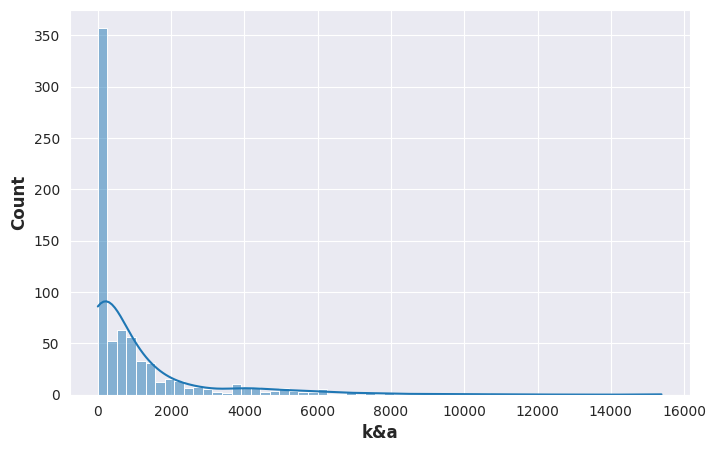

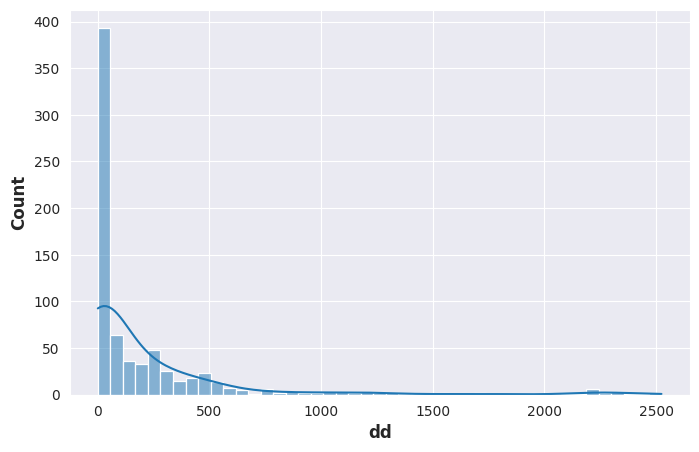

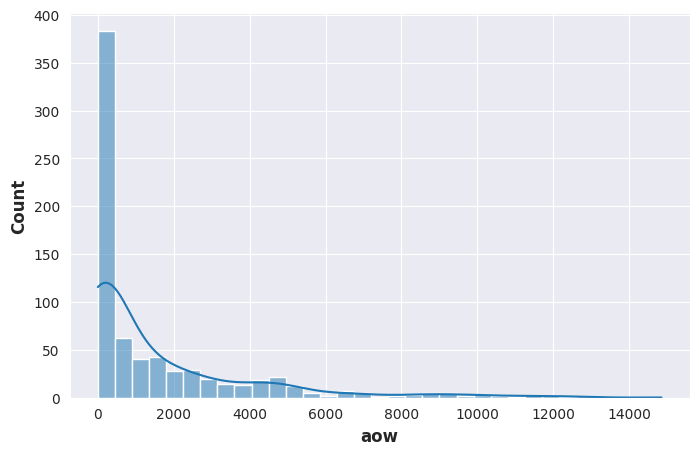

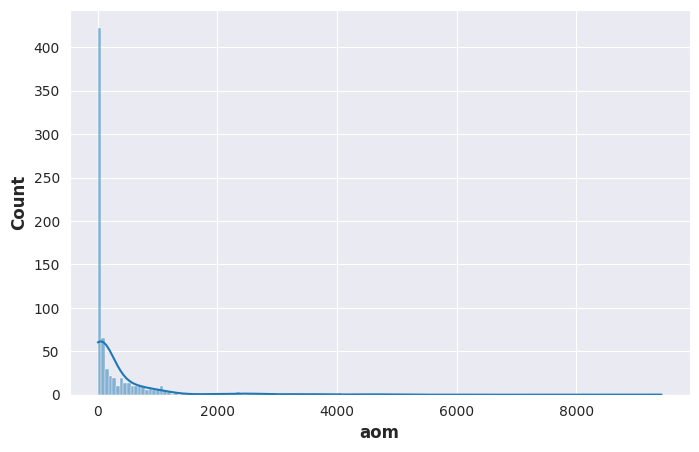

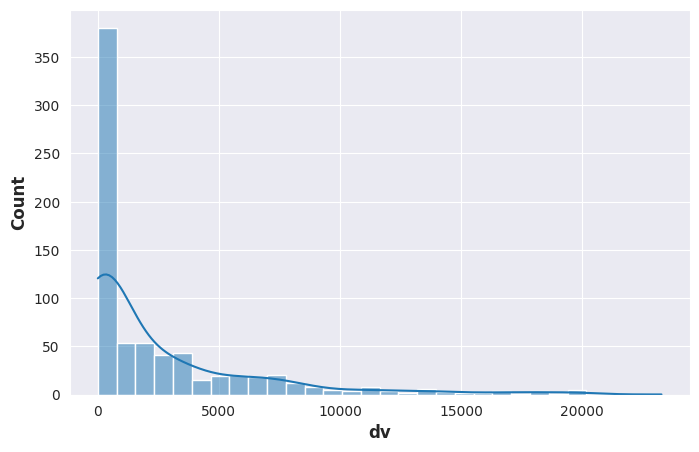

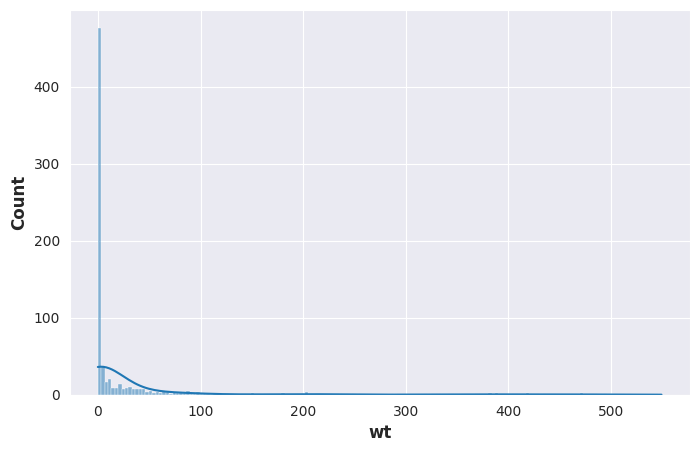

In [ ]:
for col in data1.columns:
    fig, axs = plt.subplots(figsize=std_figure_size)
    sns.histplot(data=data1, x=col, kde=True, ax=axs)
    plt.show()

**Selección de las columnas para el clustering**


*  Normalización y escalamiento del dataset data1
*  Conversion del escalamiento a un nuevo dataframe



In [ ]:
from sklearn.preprocessing import StandardScaler
features = data1[['year','rape', 'k&a', 'dd', 'aow', 'aom', 'dv', 'wt']]
#Normalizar (StandardScaler)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
#nuevo a un DataFrame
Normalizados = pd.DataFrame(features_scaled, columns=features.columns)
# Visualizacion de datos Normalizados
Normalizados.head()

,year,rape,k&a,dd,aow,aom,dv,wt
0,-1.677779,0.146610,-0.185496,0.481132,0.797991,2.406372,0.791215,-0.271993
1,-1.677779,-0.711679,-0.541889,-0.507945,-0.609643,-0.409351,-0.639741,-0.359553
2,-1.677779,0.091302,-0.032398,-0.369003,-0.296113,-0.408110,-0.333497,-0.359553
3,-1.677779,0.164021,-0.309481,1.514952,-0.413077,-0.387004,-0.256750,0.678657
4,-1.677779,0.236740,-0.483662,-0.343099,0.074680,-0.213194,-0.434505,-0.359553


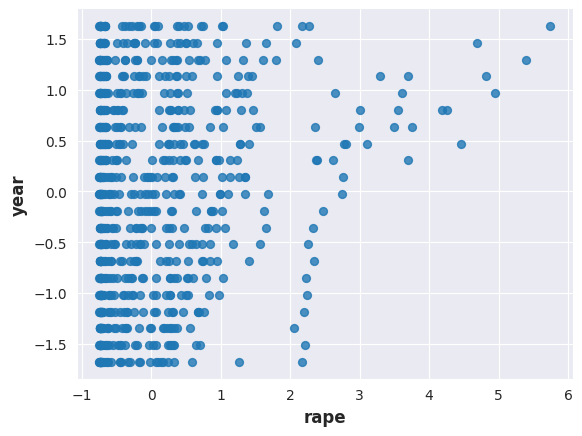

In [ ]:
# @title year vs rape
Normalizados.plot(kind='scatter', x='rape', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Reducción de dimensionalidad via** **UMAP**

Permite obtener la representación de los datos complejos,sin
perder su estructura,es utilizado para vizualizar el preprocesamiento para la eficiencia de los modelos de ML.

*   n_components= reduce los datos a 2 dimensiones
*   n_jobs = numero nucleos para acelerar el proceso




In [ ]:
algos = ["K-means", "Mean shift", "Gaussian mixtures", "Affinity propagation", "DBSCAN", "OPTICS"]
training_times = []

**Transformación y escalación de los datos.**

In [ ]:
X = StandardScaler().fit_transform(data1)
X = PowerTransformer(standardize=False).fit_transform(X)
X = pd.DataFrame(X, columns=data1.columns)


plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)


reducer = umap.UMAP(n_components=2, n_neighbors=25, n_jobs= -1, random_state=random.seed(42))
embedding = reducer.fit_transform(X)

X = pd.DataFrame(embedding, columns=["comp_1", "comp_2"])

Representacion de los datos en 2 dimensiones

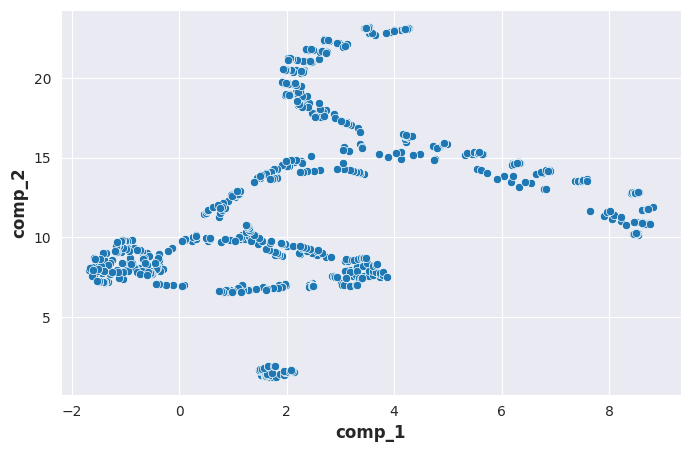

In [ ]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(data= X, x="comp_1", y="comp_2")
plt.show()

Función para la visualización e identificación de los clusters

In [ ]:
# function to visualize identified clusters

def visualize_clusters(*, df, labels_all, hyperparam_name, hyperparam_val, noise_exist):
    """Visualisation of identified clusters. Only a single hyperparameter is considered.

    Arguments
    =========
    df: pandas.DataFrame
        Dataframe of input features.
    labels_all: list | numpy.array
        Identified cluster IDs.
    hyperparam_name: str | None
        Name of hyperparameter.
    hyperparam_val: float | int | None
        Value of hyperparameter.
    noise_exist: bool
        True if algo models noise, False otherwise.
        Assumes encoding of noise as cluster ID = -1.

    Returns
    =======
    None
    Prints a figure.

    """

    # Checking of input parameters omitted for this notebook

    labels = sorted(pd.Series(labels_all).unique())

    if noise_exist:

        outlier_perc = int(round(( (len(df) - sum(np.where(labels_all == -1, False, True))) / len(df) ) * 100, 0))

        plt.figure(figsize=std_figure_size)
        for label in labels:
            if label == -1:
                marker_style = "*"
            else:
                marker_style = "o"
            sns.scatterplot(data=df.loc[labels_all == label, :], x="comp_1", y="comp_2", label=str(label), marker=marker_style)
        if hyperparam_name or hyperparam_val:
            plt.title(f"{hyperparam_name}: {hyperparam_val}; 'Noise': {outlier_perc}%")
        else:
            plt.title(f"Defaults for all hyperparameters; 'Noise': {outlier_perc}%")
        plt.legend(title="cluster ID")
        plt.show()

    else:

        plt.figure(figsize=std_figure_size)
        for label in labels:
            sns.scatterplot(data=df.loc[labels_all == label, :], x="comp_1", y="comp_2", label=str(label))
        if hyperparam_name or hyperparam_val:
            plt.title(f"{hyperparam_name}: {hyperparam_val}")
        else:
            plt.title(f"Defaults for all hyperparameters")
        plt.legend(title="cluster ID")
        plt.show()


def convergence_check(model):
    """Checking if fitted model converged within the max. number of iterations."""
    if model.n_iter_ < model.max_iter:
        print(f"Algorithm converged successfully!\nn_iter: {model.n_iter_}, max_iter: {model.max_iter}\n")
    else:
        print(f"WARNING: Algorithm did not converge within {model.max_iter} iterations!\n")

**K-MEANS**

Este algoritmo busca encontrar el numero de clusters optimos haciendo uso de el metodo de elbow.

In [ ]:
kmeans_hparam = "n_clusters"

inertias_1 = []
range_clusters_1 = np.arange(2, 15, dtype=int)

for n in range_clusters_1:
    kmeans_1 = KMeans(n_clusters=n, random_state=random.seed(42)).fit(X)
    inertias_1.append(kmeans_1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

**Error cuadratico**

In [ ]:
sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data1)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

**Método de Elbow**

Identicación de el numero de clusters optimos

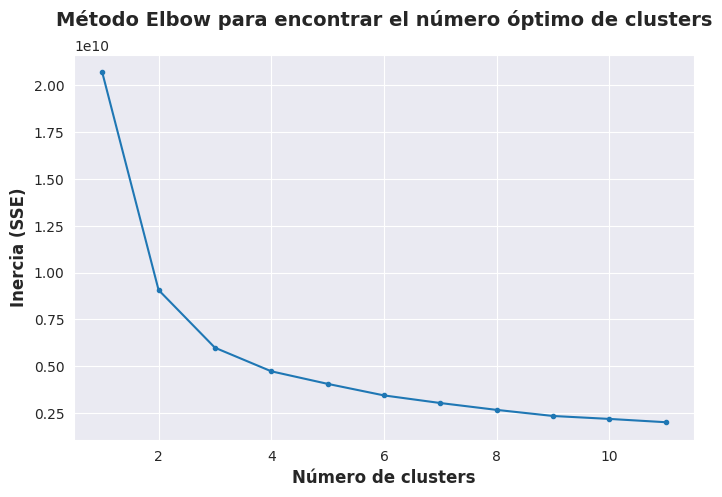

In [ ]:
plt.figure(figsize=std_figure_size)
plt.plot(range(1, 12), sse, marker='.')
plt.title('Método Elbow para encontrar el número óptimo de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia (SSE)')
plt.show()

Visualización de los cluster, se toma de referencia 3 clusters respecto al gráfico de elbow,debido a que eentre 2 a 4 se encuentra el codo o cambio significativo.

In [ ]:
from sklearn.cluster import KMeans

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)

# Agregar las etiquetas de los clusters al DataFrame original
data1['Cluster'] = kmeans.labels_

data1
#data1.to_csv("data1_with_clusters.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Year,Rape,K&A,DD,AoW,AoM,DV,WT,Cluster
0,2001,871,765,420,3544,2271,5791,7,0
1,2001,33,55,0,78,3,11,0,1
2,2001,817,1070,59,850,4,1248,0,1
3,2001,888,518,859,562,21,1558,83,1
4,2001,959,171,70,1763,161,840,0,1
...,...,...,...,...,...,...,...,...,...
731,2021,1250,4083,141,2068,417,4731,4,0
732,2021,315,904,16,1851,10,501,1,1
733,2021,2,1,0,5,1,9,0,1
734,2021,0,0,0,1,1,3,0,1


Se evidencia que el metodo K-means filtra los datos correspondientes para cada cluster.

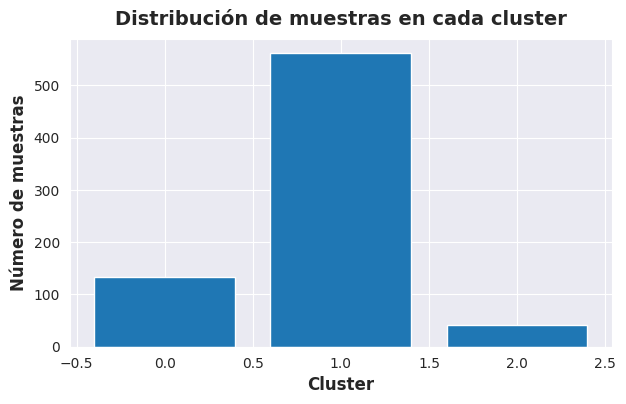

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(range(3), [len(data1[data1['Cluster'] == i]) for i in range(3)])
plt.xlabel('Cluster')
plt.ylabel('Número de muestras')
plt.title('Distribución de muestras en cada cluster')
plt.show()

En el gráfico se evidencia los datos que se han tomado para cada cluster y la cantidad correspondiente a cada uno.

In [ ]:
# @title Descripción de los clusters
cluster_tables = []

for cluster in range(3):
    # Filtrar los datos de cada cluster
    cluster_data = data1[data1['Cluster'] == cluster]

    # Obtener descripción
    cluster_desc = cluster_data.describe()

    # Agregar la descripcion a la tabla
    cluster_tables.append(cluster_desc)

# Concatenar los datos
summary_table = pd.concat(cluster_tables, keys=[f'Cluster {i + 1}' for i in range(3)])
display(summary_table)

Year         Rape           K&A           DD  \
Cluster 1 count   133.000000   133.000000    133.000000   133.000000   
          mean   2013.285714  2179.060150   4099.872180   746.721805   
          std       5.675000  1234.123187   2998.285466   684.921610   
          min    2001.000000   552.000000    534.000000     1.000000   
          25%    2009.000000  1211.000000   1564.000000   341.000000   
          50%    2014.000000  1832.000000   3895.000000   498.000000   
          75%    2018.000000  2891.000000   5496.000000   811.000000   
          max    2021.000000  6337.000000  15381.000000  2524.000000   
Cluster 2 count   561.000000   561.000000    561.000000   561.000000   
          mean   2010.352941   360.711230    433.547237    88.005348   
          std       6.086008   460.436445    685.887810   192.996535   
          min    2001.000000     0.000000      0.000000     0.000000   
          25%    2005.000000    20.000000     10.000000     0.000000   
          50%    2010.000000   113.000000    107.000000     4.000000   
          75%    2016.000000   571.000000    644.000000    93.000000   
          max    2021.000000  2091.000000   4083.000000  1538.000000   
Cluster 3 count    42.000000    42.000000     42.000000    42.000000   
          mean   2015.023810  1036.380952   1107.619048   239.642857   
          std       2.909095   734.757035    792.392116   281.813450   
          min    2011.000000   283.000000    166.000000     8.000000   
          25%    2013.000000   515.250000    697.500000    59.750000   
          50%    2015.000000   975.000000    977.000000   193.500000   
          75%    2017.000000  1272.500000   1443.500000   274.750000   
          max    2021.000000  4144.000000   5096.000000  1730.000000   

                          AoW          AoM            DV          WT  Cluster  
Cluster 1 count    133.000000   133.000000    133.000000  133.000000    133.0  
          mean    5104.924812  1099.541353   8690.496241   36.864662      0.0  
          std     3278.776928  1420.493344   5116.698500   48.411554      0.0  
          min        0.000000     1.000000   1935.000000    0.000000      0.0  
          25%     2870.000000   108.000000   4159.000000    3.000000      0.0  
          50%     4499.000000   695.000000   7696.000000   22.000000      0.0  
          75%     6848.000000  1150.000000  11408.000000   50.000000      0.0  
          max    14853.000000  9422.000000  23278.000000  303.000000      0.0  
Cluster 2 count    561.000000   561.000000    561.000000  561.000000    561.0  
          mean     604.288770   106.180036    997.032086    5.766488      1.0  
          std      900.225753   215.556782   1637.808780   15.441619      0.0  
          min        0.000000     0.000000      0.000000    0.000000      1.0  
          25%       21.000000     1.000000      6.000000    0.000000      1.0  
          50%      103.000000    15.000000    141.000000    0.000000      1.0  
          75%      899.000000    93.000000   1289.000000    3.000000      1.0  
          max     4907.000000  1718.000000   8170.000000  137.000000      1.0  
Cluster 3 count     42.000000    42.000000     42.000000   42.000000     42.0  
          mean    3434.952381   930.428571   4638.261905  309.952381      2.0  
          std     2509.774346  1240.968154   3494.967225  124.432752      0.0  
          min        0.000000     7.000000    689.000000  113.000000      2.0  
          25%     1083.250000   109.000000   2067.000000  198.750000      2.0  
          50%     3924.000000   481.000000   3561.500000  329.000000      2.0  
          75%     4910.000000  1126.750000   6738.500000  399.750000      2.0  
          max    11713.000000  4751.000000  15084.000000  549.000000      2.0

**REPRESENTACIÓN DE LOS DATOS**  

In [ ]:
from prettytable import PrettyTable

def create_cluster_table(cluster_number, violencia_data):
    tabla = PrettyTable()
    tabla.title = f"Cluster {cluster_number}"
    tabla.field_names = ["T_Violencia", "N_Casos", "Descripción"]

    for t_violencia, n_casos, descripcion in violencia_data:
        tabla.add_row([t_violencia, n_casos, descripcion])

    return tabla

cluster_1 = [
    ["Rape(violación)",2179 , "alto número de incidentes en casi todas las categorías."],
    ["K&A(secuestro, abducción)", 4099, "especialmente en violencia doméstica (DV)"],
    ["DD", 746, "asaltos a mujeres (AoW), y secuestro y abducción (K&A)"],
    ["AoW(asalto)", 5104, "este cluster agrupa niveles altos"],
    ["AoM(insultos)", 1099, "en diversos tipos de violencia contra las mujeres"],
    ["DV(violencia doméstica)", 8690, "Representa la mayor incidencia de la violencia contra la mujer"],
    ["WT(tráfico de mujeres)", 36, "2001 al 2021"],
]

cluster_2 = [
    ["Rape(violación)", 360, "Los niveles de incidentes tienden a disminuir"],
    ["K&A(secuestro, abducción)", 433, "este cluster representa"],
    ["DD", 88, "las areas menos afectadas de "],
    ["AoW(insultos)", 604, "la violencia en contra de la mujer"],
    ["AoM(insultos)", 106, ""],
    ["DV(violencia doméstica)", 997, "Representa áreas con menos incidencia de violencia"],
    ["WT(tráfico de mujeres)", 5, "2001 al 2021"],
]

cluster_3 = [
    ["Rape(violación)", 1036, "Se destacan entre los datos"],
    ["K&A(secuestro, abducción)", 1107, "el asalto a mujeres (AoW) y"],
    ["DD", 239, "la violencia doméstica (DV)"],
    ["AoW(insultos)", 3434, "ademas de niveles elevados de tráfico de mujeres (WT)"],
    ["AoM(insultos)", 930, ""],
    ["DV(violencia doméstica)", 4638, "Este cluster se defirencia de los demas con respecto al aumento del tráfico de mujeres"],
    ["WT(tráfico de mujeres)", 309, "2011 al 2021"],
]

# Crear tablas para cada clúster
tabla1 = create_cluster_table(1, cluster_1)
tabla2 = create_cluster_table(2, cluster_2)
tabla3 = create_cluster_table(3, cluster_3)

# Imprimir las tablas
print("Cantidad de muestras 133",tabla1)
print()
print("Cantidad de muestras 561",tabla2)
print()
print("Cantidad de muestras 42",tabla3)

Cantidad de muestras 133 +------------------------------------------------------------------------------------------------------+
|                                              Cluster 1                                               |
+---------------------------+---------+----------------------------------------------------------------+
|        T_Violencia        | N_Casos |                          Descripción                           |
+---------------------------+---------+----------------------------------------------------------------+
|      Rape(violación)      |   2179  |    alto número de incidentes en casi todas las categorías.     |
| K&A(secuestro, abducción) |   4099  |           especialmente en violencia doméstica (DV)            |
|             DD            |   746   |     asaltos a mujeres (AoW), y secuestro y abducción (K&A)     |
|        AoW(asalto)        |   5104  |               este cluster agrupa niveles altos                |
|       AoM(insultos)       | 

In [ ]:
%%time

start_time = time.time()

kmeans = KMeans(n_clusters=3, random_state=random.seed(42))

labels_1 = kmeans.fit_predict(X)

convergence_check(kmeans)

training_times.append(time.time() - start_time)

Algorithm converged successfully!
n_iter: 6, max_iter: 300

CPU times: user 19.5 ms, sys: 791 µs, total: 20.3 ms
Wall time: 21.1 ms


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


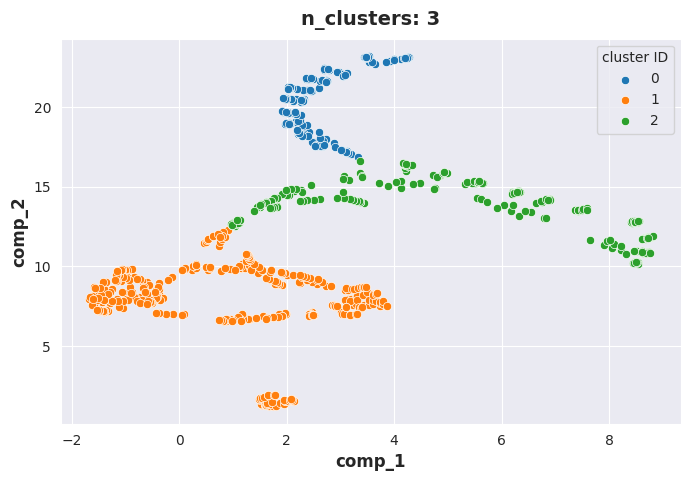

In [ ]:
visualize_clusters(df=X, labels_all=labels_1, hyperparam_name=kmeans_hparam, hyperparam_val=3, noise_exist=False)

Los datos correspondientes a cada cluster nos muestran claridad los mismos,por lo que causa mas confianza en el etiquetado de los datos.

**2- MEAN-SHIFT**

Bandwith

Este metodo se basa en centroides y no se debe especificar el numero de grupos

In [ ]:
meanshift_hparam = "bandwidth"

In [ ]:
%%time

start_time = time.time()

meanshift = MeanShift(n_jobs=-1)

labels_2 = meanshift.fit_predict(X)

convergence_check(meanshift)

training_times.append(time.time() - start_time)

Algorithm converged successfully!
n_iter: 23, max_iter: 300

CPU times: user 327 ms, sys: 12.9 ms, total: 340 ms
Wall time: 2.76 s


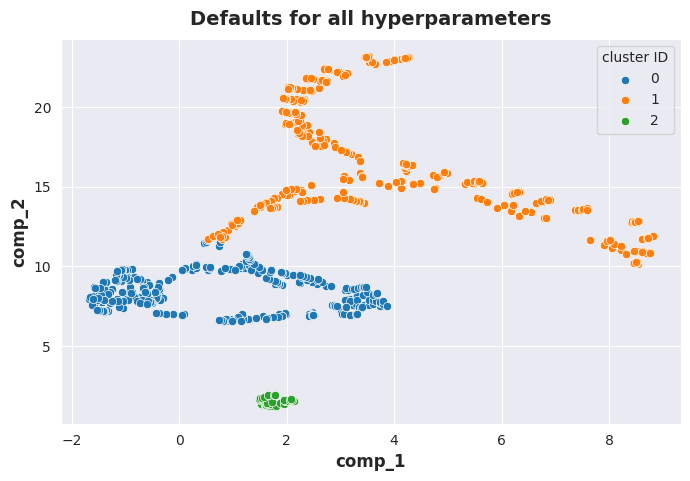

In [ ]:
visualize_clusters(df=X, labels_all=labels_2, hyperparam_name=None, hyperparam_val=None, noise_exist=False)

El resultado muestra que los datos se enceuntran menos dispersos por lo que el hiperparametro no necesita ser ajustado.

Allowing for 'noise

Se establece cluster_all=False

In [ ]:
%%time

start_time = time.time()

meanshift = MeanShift(cluster_all=False, n_jobs=-1)

labels_2 = meanshift.fit_predict(X)

convergence_check(meanshift)

training_time_meanshift_noise = time.time() - start_time

Algorithm converged successfully!
n_iter: 23, max_iter: 300

CPU times: user 317 ms, sys: 12.9 ms, total: 330 ms
Wall time: 2.8 s


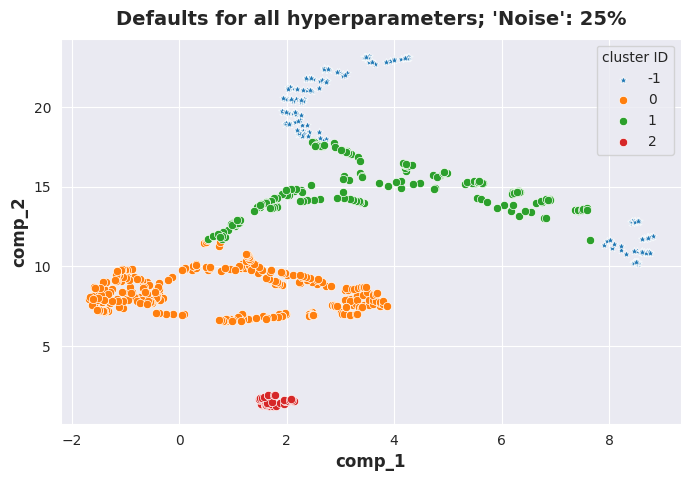

In [ ]:
visualize_clusters(df=X, labels_all=labels_2, hyperparam_name=None, hyperparam_val=None, noise_exist=True)

El resultado los datos marcados con estrellas azules las cuales hacen referencia a que los datos no pertenecen a ningun grupo,por lo que nos elimina datos que pueden ser significativos para el analisis.

**3- Gaussian Mixture**

Basado en la distribución,donde n_componentes hace referencia a los cluster a formar.

In [ ]:
gmm_hparam = "n_components"

In [ ]:
%%time

start_time = time.time()

gmm = GaussianMixture(n_components=3, random_state=random.seed(42))

labels_3 = gmm.fit_predict(X)

convergence_check(gmm)

training_times.append(time.time() - start_time)

Algorithm converged successfully!
n_iter: 16, max_iter: 100

CPU times: user 100 ms, sys: 1.82 ms, total: 102 ms
Wall time: 90.7 ms


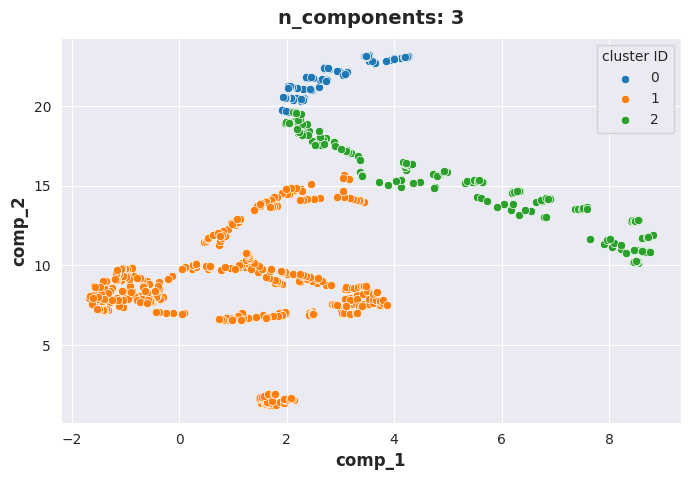

In [ ]:
visualize_clusters(df=X, labels_all=labels_3, hyperparam_name=gmm_hparam, hyperparam_val=3, noise_exist=False)

Los resultados son similares al metodo k-means que nos etiqueta los datos en 3 cluster aprovechando todo dato.

**4- Affinity propagation**

 No se requiere especificar la cantidad de clústeres, ademas el hiperparametro se encuentra entre el rango de 0,5 a 1 0.

In [ ]:
affprop_hparam = "damping"

In [ ]:
%%time

affprop = AffinityPropagation(random_state= random.seed(42))

labels_4 = affprop.fit_predict(X)

convergence_check(affprop)


CPU times: user 1.65 s, sys: 100 ms, total: 1.75 s
Wall time: 1.76 s


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


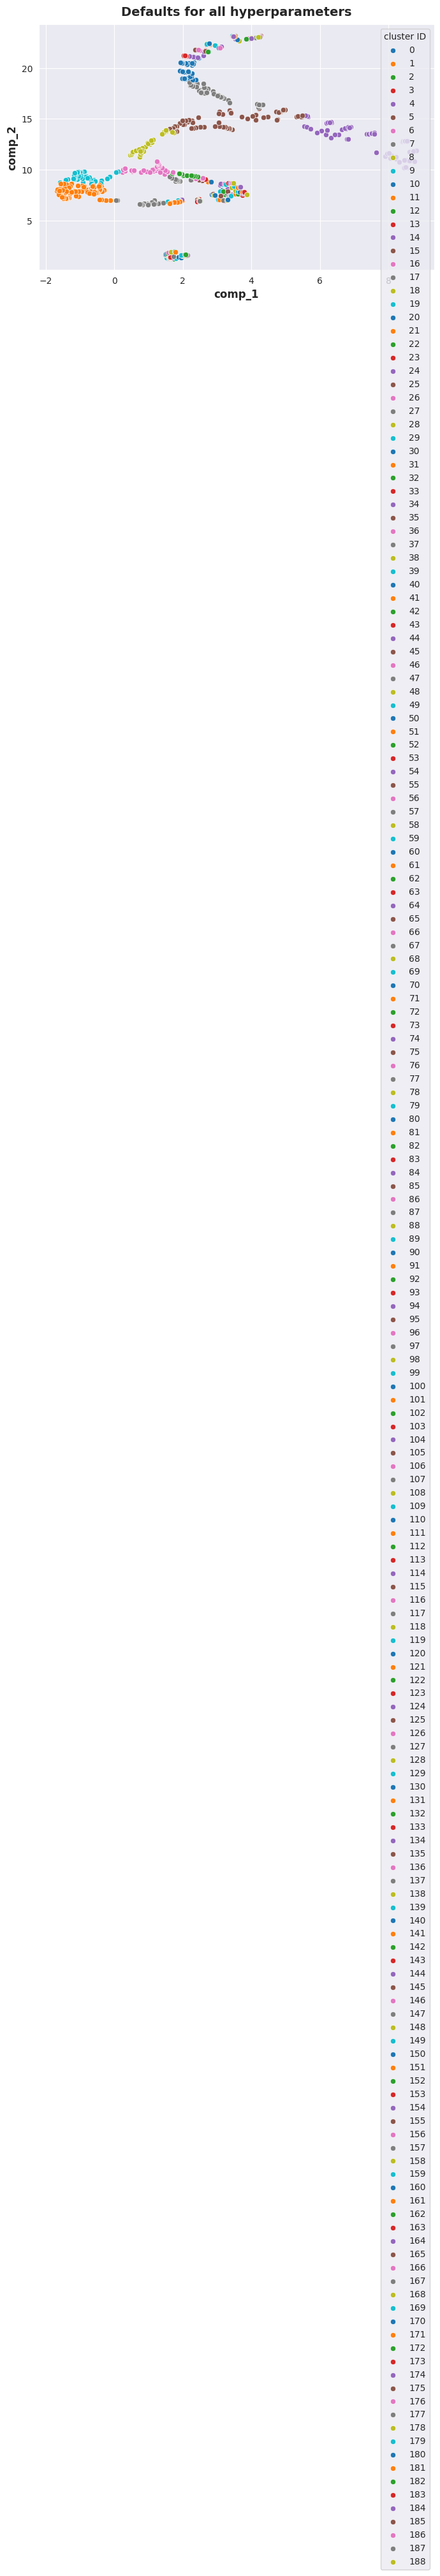

In [ ]:
visualize_clusters(df=X, labels_all=labels_4, hyperparam_name=None, hyperparam_val=None, noise_exist=False)

Lo que se puede apreciar del grafico es que el metodo identifica cantidad de cluster con demasiadas relaciones entre las variables,lo que nos dificulta entenderlos.

**Tuning runs for "damping"**

Se realizan pruebas de el valor de Amortiguación para Observar su comportamiento.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


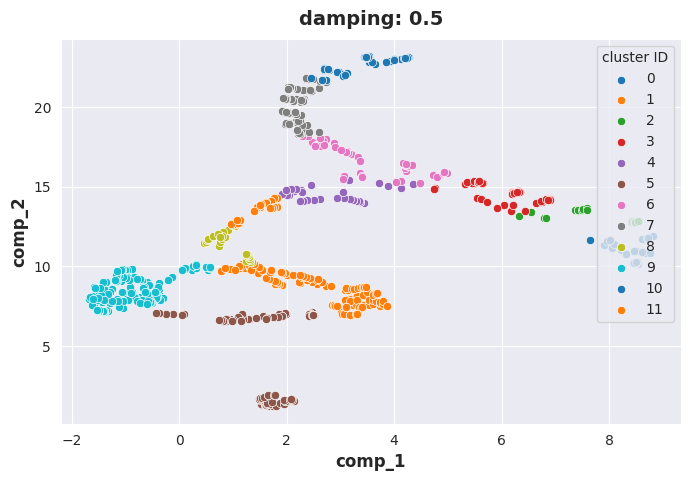

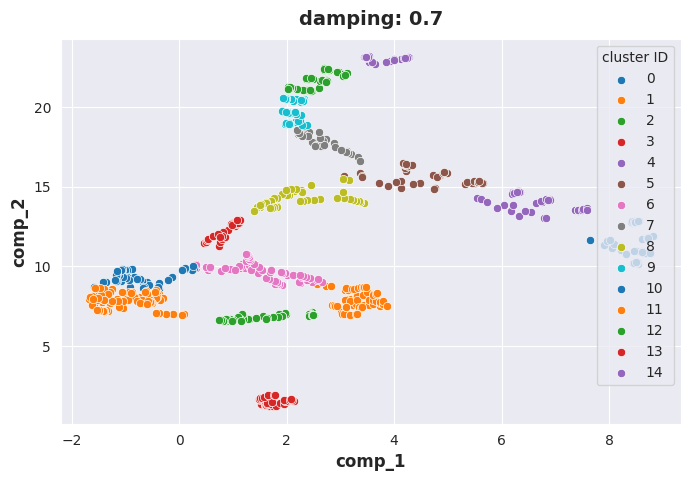

Algorithm converged successfully!
n_iter: 36, max_iter: 500



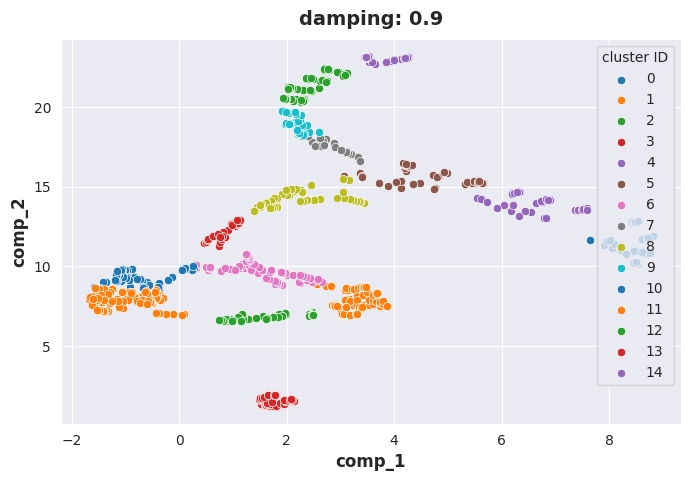

Algorithm converged successfully!
n_iter: 54, max_iter: 500



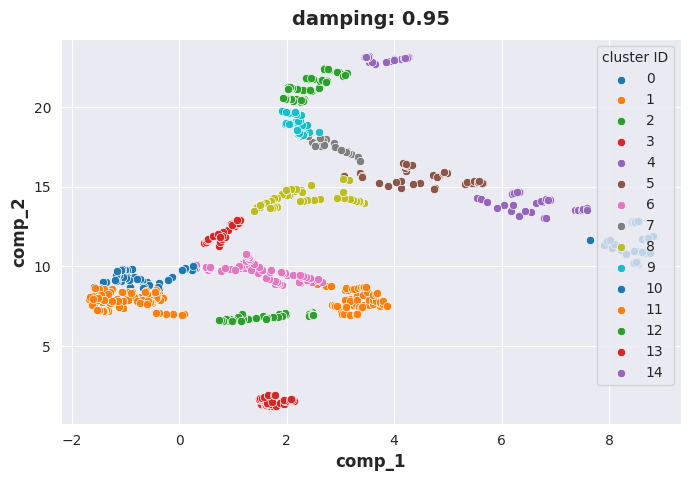

Algorithm converged successfully!
n_iter: 90, max_iter: 500



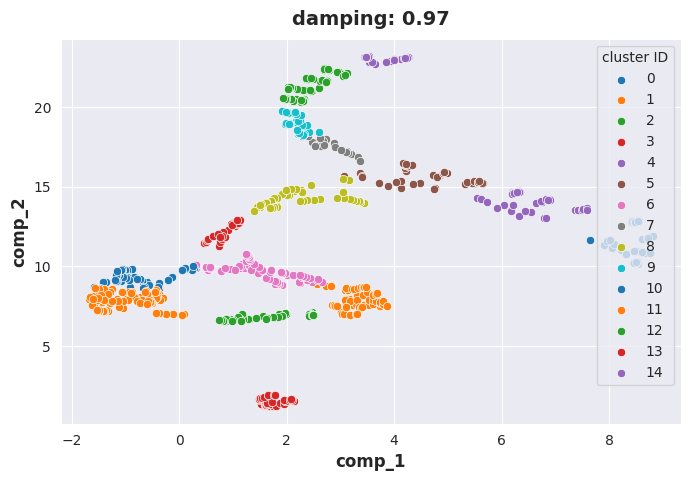

Algorithm converged successfully!
n_iter: 152, max_iter: 500



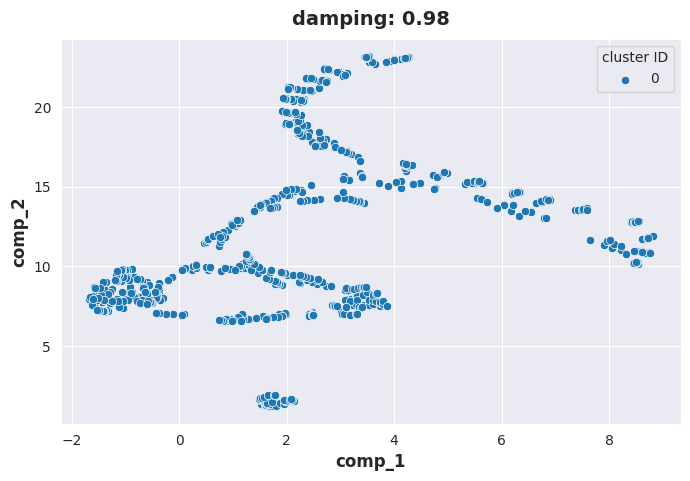

Algorithm converged successfully!
n_iter: 133, max_iter: 500



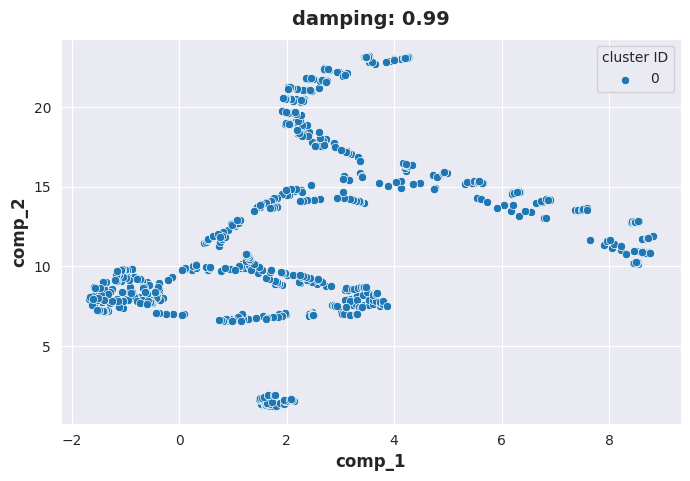

Algorithm converged successfully!
n_iter: 253, max_iter: 500

CPU times: user 16.5 s, sys: 1.22 s, total: 17.7 s
Wall time: 17.4 s


In [ ]:
%%time

damps = [0.5, 0.7, 0.9, 0.95, 0.97,0.98, 0.99]

for d in damps:
    affprop = AffinityPropagation(damping=d, max_iter=500, random_state=random.seed(42))
    labels_4 = affprop.fit_predict(X)
    visualize_clusters(df=X, labels_all=labels_4, hyperparam_name=affprop_hparam, hyperparam_val=d, noise_exist=False)
    convergence_check(affprop)

*Para este conjunto de datos al aumentar el damping tiende a que con un solo cluster se identifican todos los datos.

**Preference**

In [ ]:
affprop_hparam = "preference"

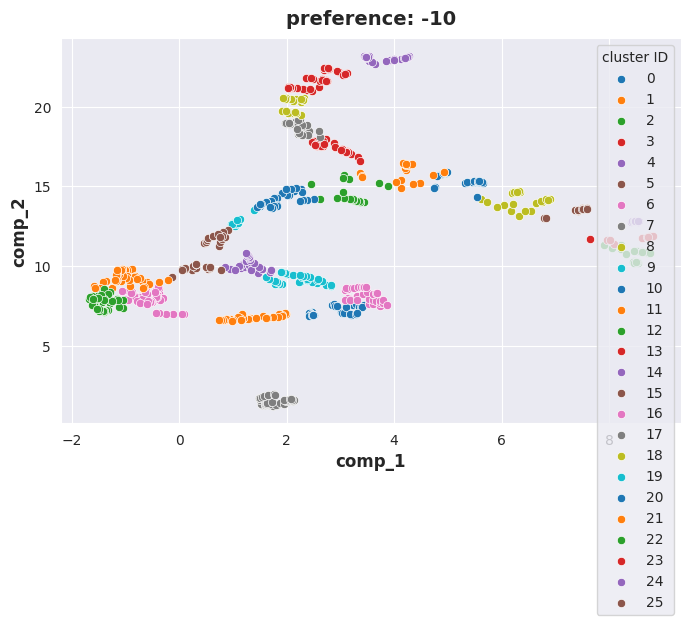

Algorithm converged successfully!
n_iter: 407, max_iter: 500



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


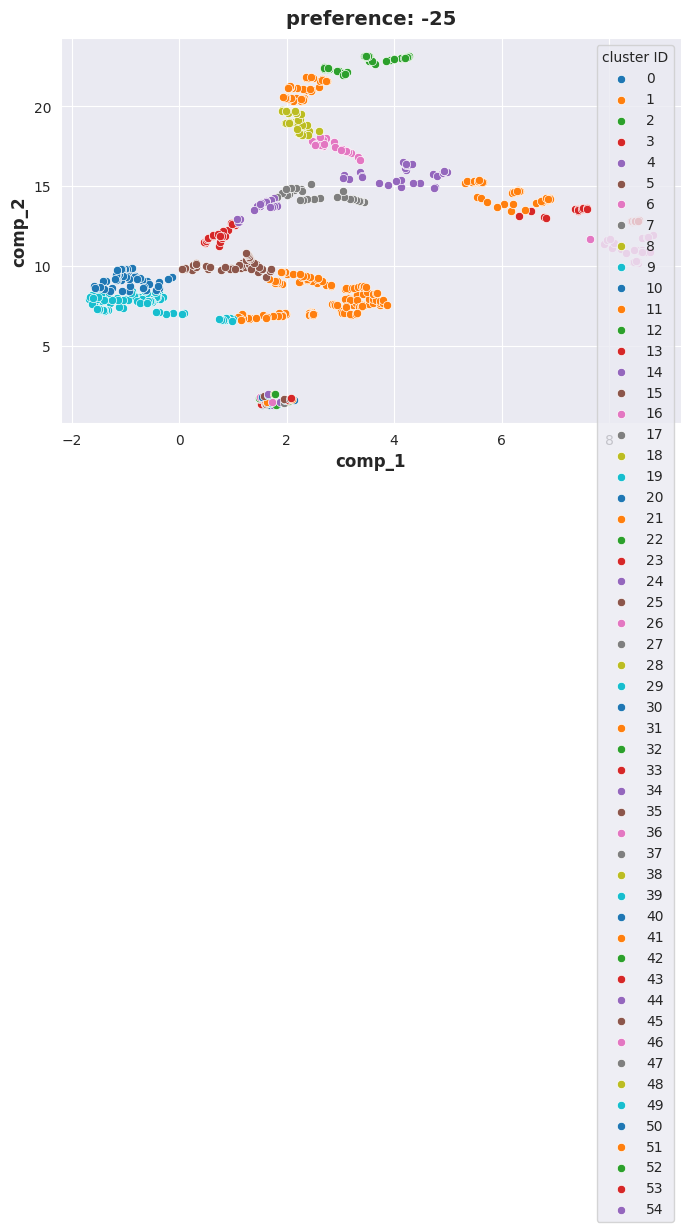

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


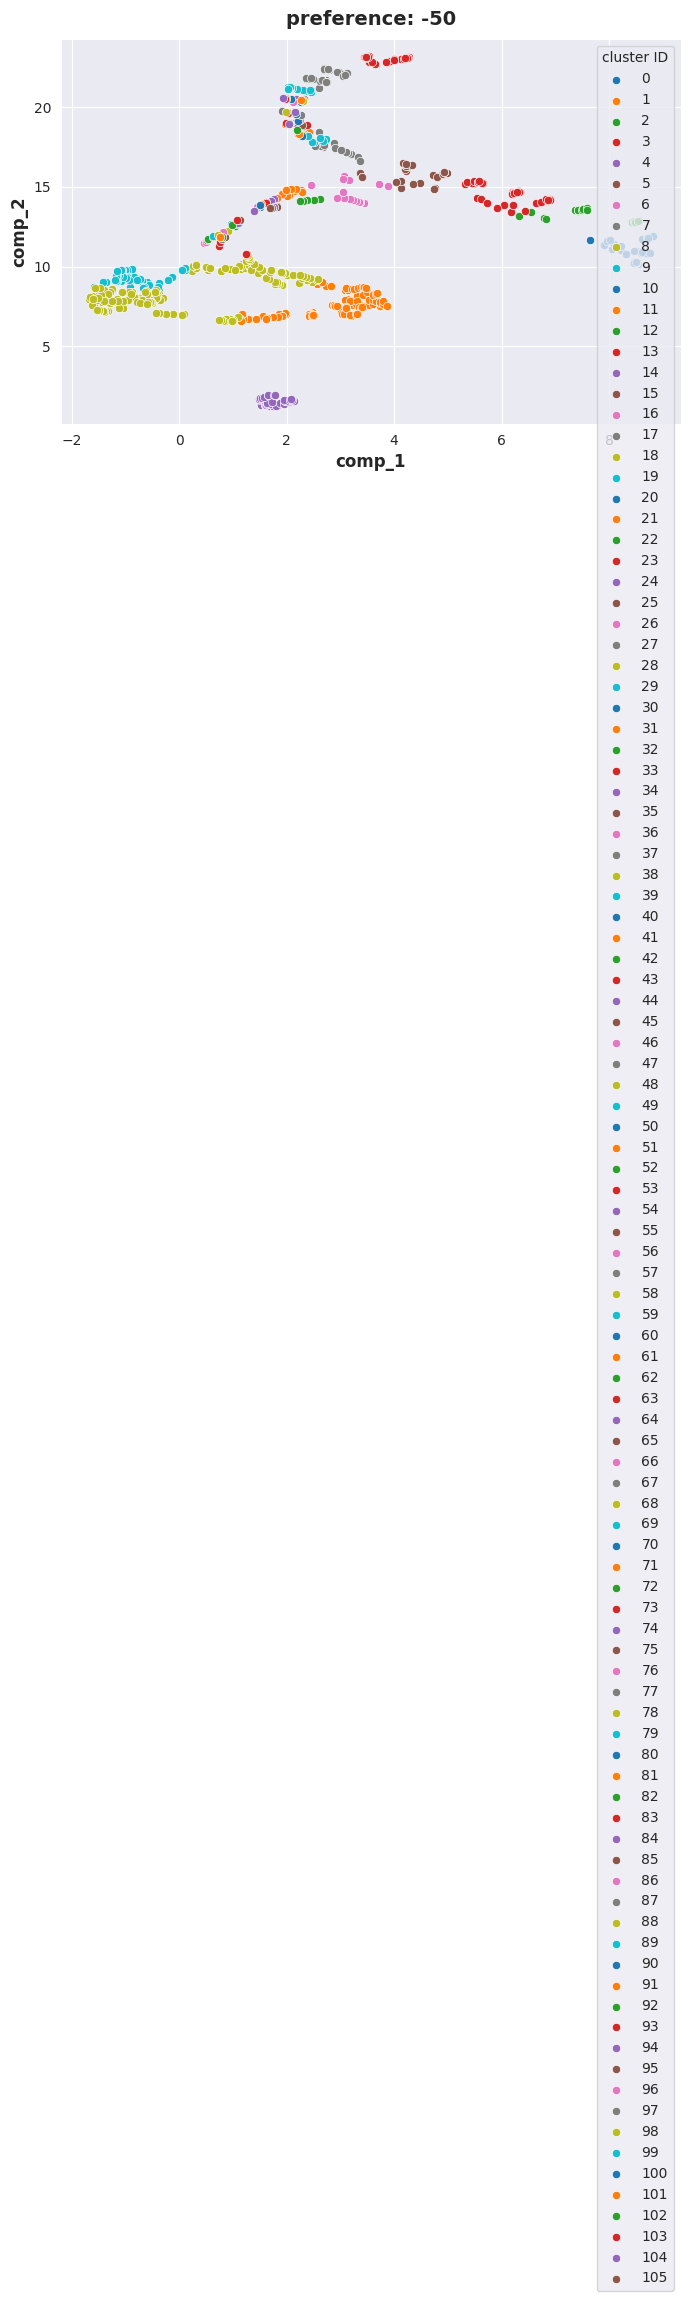

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


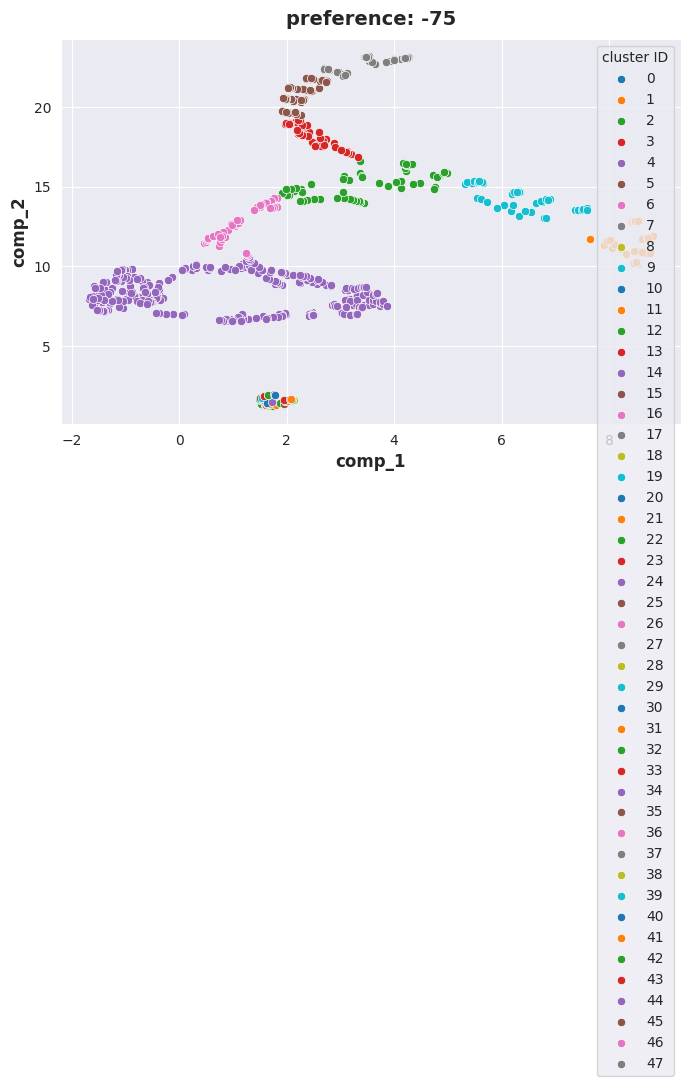

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


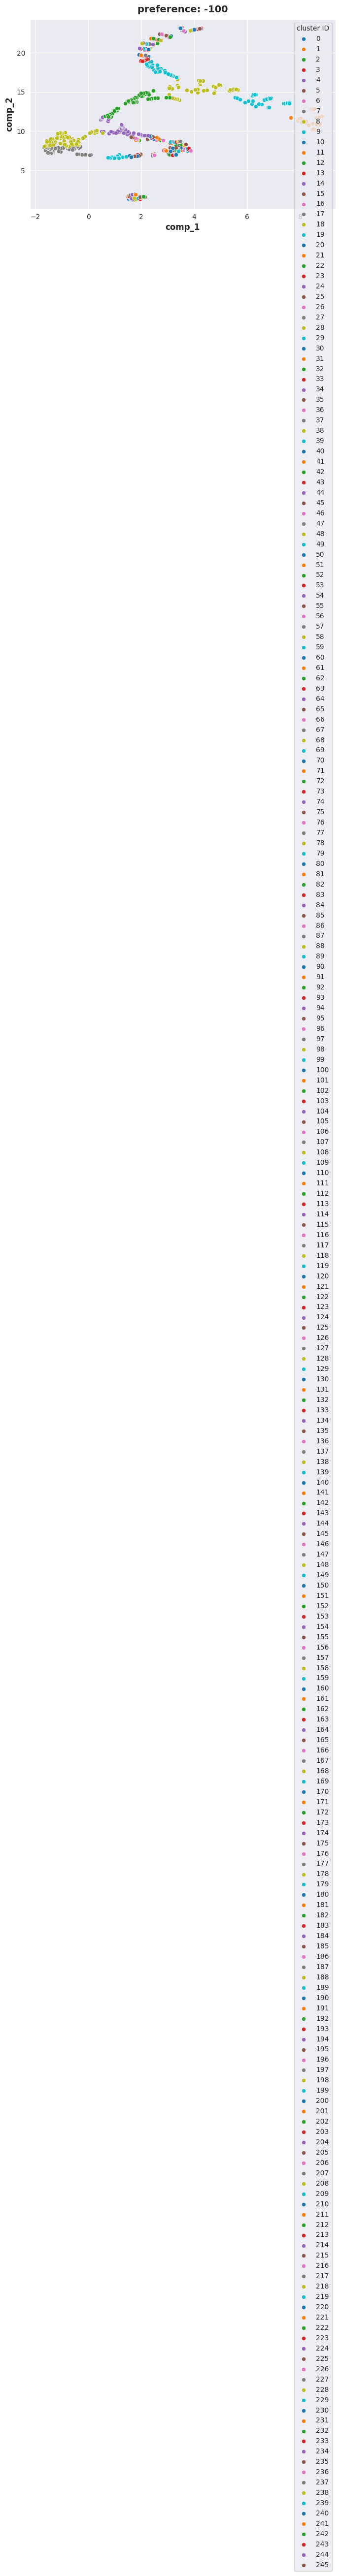


CPU times: user 1min 18s, sys: 1.41 s, total: 1min 20s
Wall time: 1min 25s


In [ ]:
%%time

prefs = [-10, -25, -50, -75, -100]

for p in prefs:
    affprop = AffinityPropagation(preference=p, max_iter=500, random_state=random.seed(42))
    labels_4 = affprop.fit_predict(X)
    visualize_clusters(df=X, labels_all=labels_4, hyperparam_name=affprop_hparam, hyperparam_val=p, noise_exist=False)
    convergence_check(affprop)

 El metodo de preferencia tiene menos influencia en este conjunto de datos con respecto al metodo de amortiguación, debido a que menos preferencia aumenta la cantidad de cluster.

**Re-run with optimised preference**

In [ ]:
%%time

start_time = time.time()

affprop = AffinityPropagation(preference=-75, max_iter=500, random_state=random.seed(42))

labels_4 = affprop.fit_predict(X)

convergence_check(affprop)

training_times.append(time.time() - start_time)


CPU times: user 4.65 s, sys: 89 ms, total: 4.73 s
Wall time: 4.86 s


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


**DBSCAN**

Su principal hiperparámetro es eps, que es la distancia máxima entre dos muestras para que una se considere cercana a la otra. Su valor predeterminado es 0,5.

Este algoritmo viene con un segundo hiperparámetro importante, que es min_samples(número de muestras en un punto considerado como punto central).

DBSCAN es determinista por lo que no requiere verificación de convergencia,ademas de identificar "ruido", o puntos de datos no asociados con ningún grupo(que se representan como estrellas azules).

In [ ]:
dbscan_hparam = "eps"

*Parametros por default.

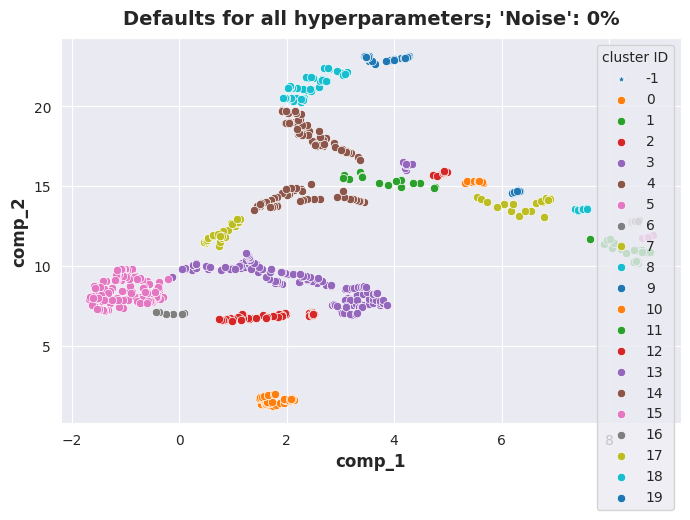

CPU times: user 1.23 s, sys: 128 ms, total: 1.36 s
Wall time: 1.25 s


In [ ]:
%%time

dbscan = DBSCAN(n_jobs=-1)

labels_5 = dbscan.fit_predict(X)

visualize_clusters(df=X, labels_all=labels_5, hyperparam_name=None, hyperparam_val=None, noise_exist=True)

Los hiperparámetros por defecto nos indican que los datos son relativamente limpios. No obstante, se observó una segmentación excesiva en los clusters. Para refinar esta agrupación, se ajustará el valor de 'eps' y se evaluará su influencia en la formación de los clusters

**Tuning runs for eps**

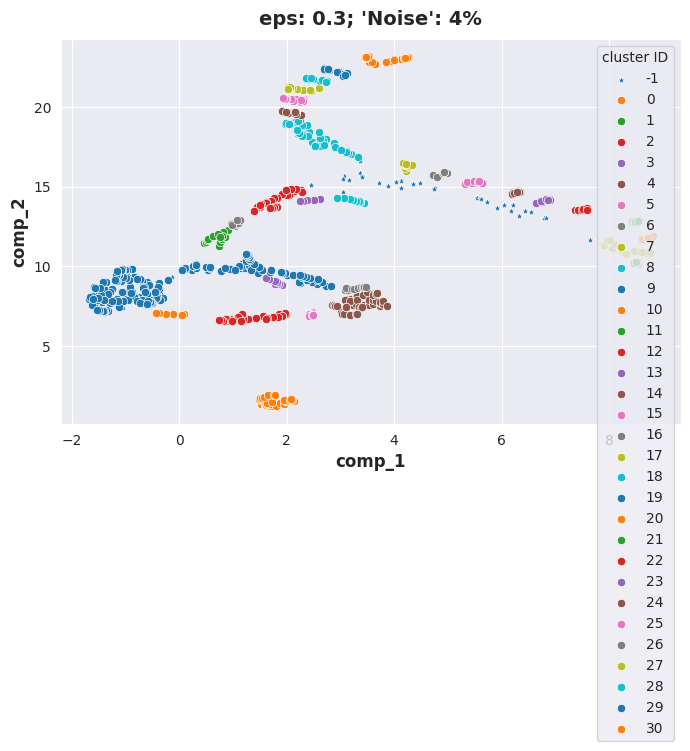

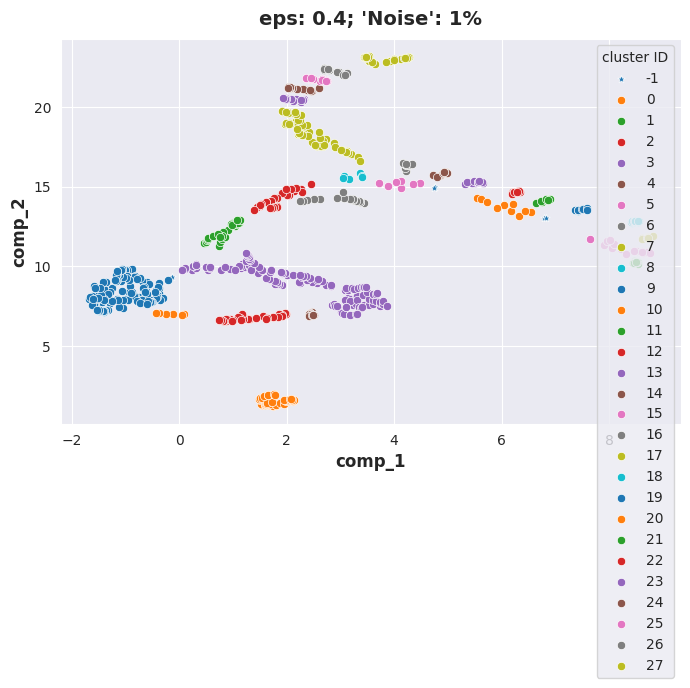

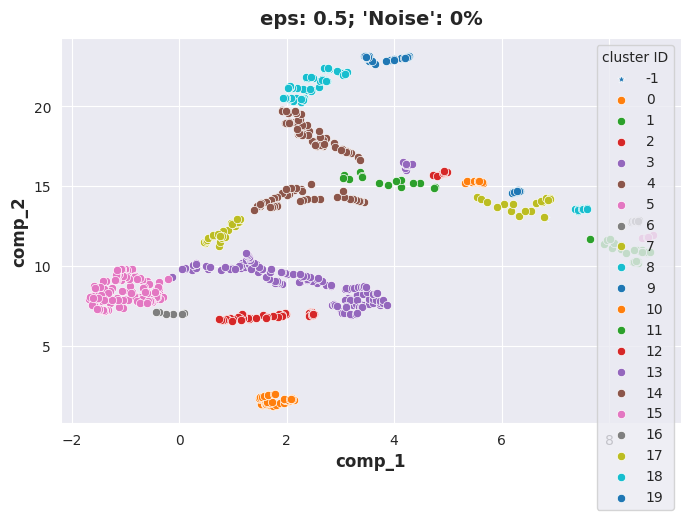

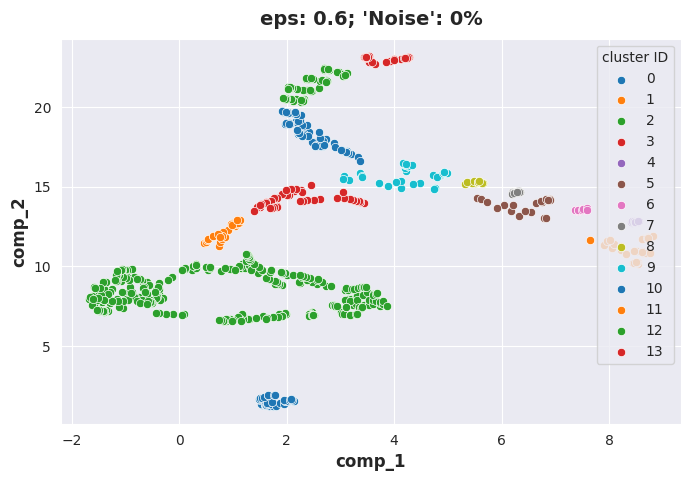

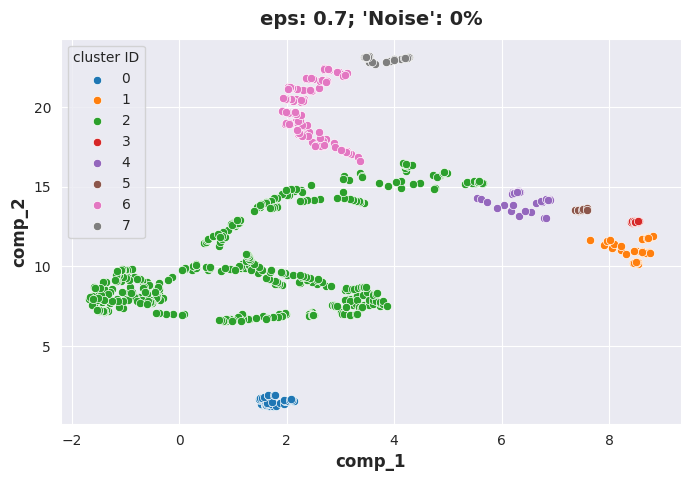

CPU times: user 7.69 s, sys: 555 ms, total: 8.25 s
Wall time: 7.94 s


In [ ]:
%%time

for e in [0.3, 0.4, 0.5, 0.6, 0.7]:

    dbscan = DBSCAN(eps=e, n_jobs=-1)
    labels_5 = dbscan.fit_predict(X)

    visualize_clusters(df=X, labels_all=labels_5, hyperparam_name=dbscan_hparam, hyperparam_val=e, noise_exist=True)

Correspondiente al valorde eps 0.7 optimiza el nuemero de cluster sin descartar ningun dato,sin embargo correspondiente al metodo de elbow la cantidad optima deberian ser solo 3.
por ende se deberian ajustar mas parametros para lograr ese valor en la cantidad de cluster.

In [ ]:
%%time

eps_val = 0.7

start_time = time.time()

dbscan = DBSCAN(eps=eps_val, n_jobs=-1)

labels_5 = dbscan.fit_predict(X)

training_times.append(time.time() - start_time)

CPU times: user 14.4 ms, sys: 914 µs, total: 15.3 ms
Wall time: 21.7 ms


**6- OPTICS**

Versión "avanzada" de DBSCAN. Su diferencia  presenta un radio de vecindad entre las variables. Su principal hiperparámetro a ajustar es min_samples, para que un punto se considere central.

In [ ]:
optics_hparam = "min_samples"

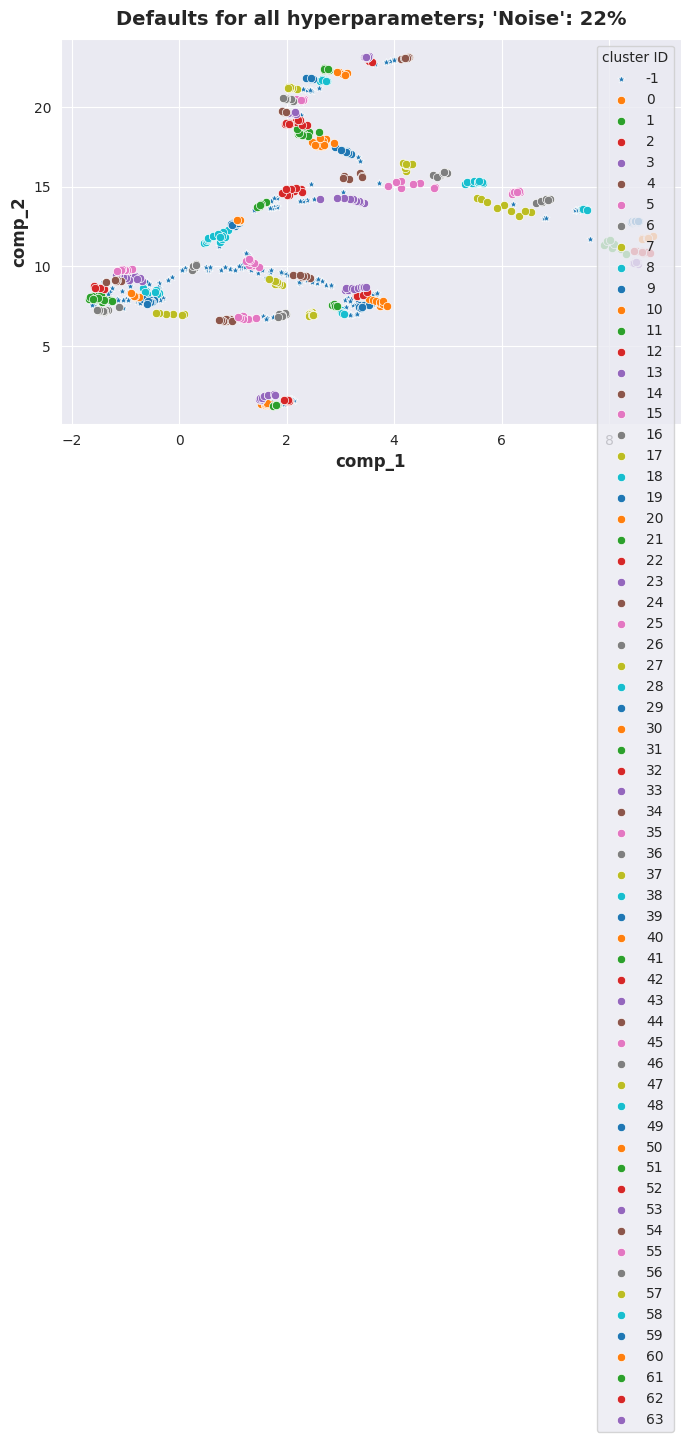

CPU times: user 7.71 s, sys: 808 ms, total: 8.52 s
Wall time: 15.4 s


In [ ]:
%%time

optics = OPTICS(n_jobs=-1)

labels_6 = optics.fit_predict(X)

visualize_clusters(df=X, labels_all=labels_6, hyperparam_name=None, hyperparam_val=None, noise_exist=True)

El resultado identifica que entre los clusters se encuentran varios datos que se consideran como ruido o irrelevantes aun asi basados en el método de elbow se estan utilizando cantidad de cluster para identificar similitudes entre los datos.

Tuning runs for min_samples

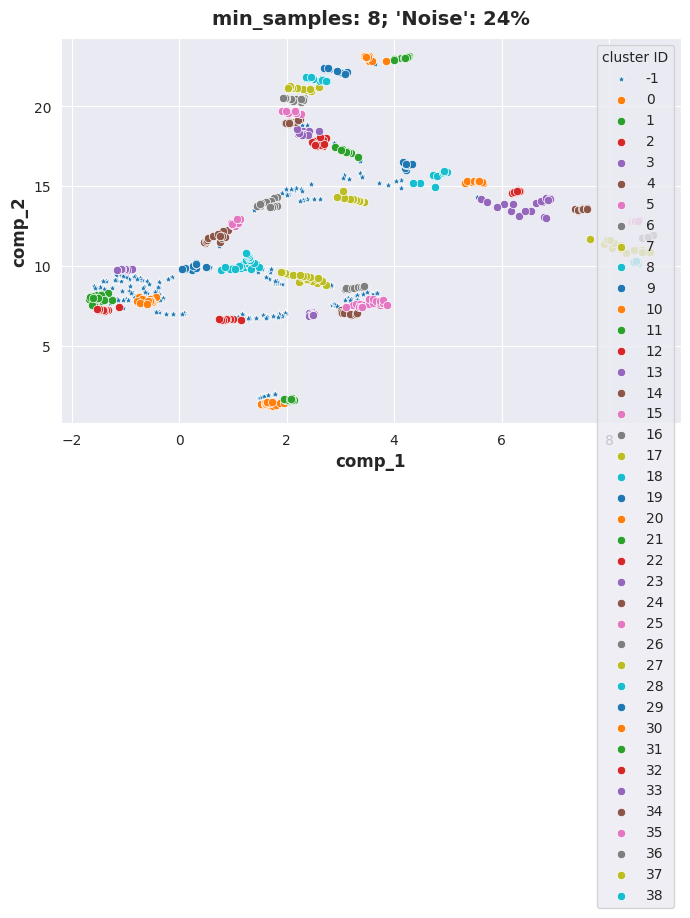

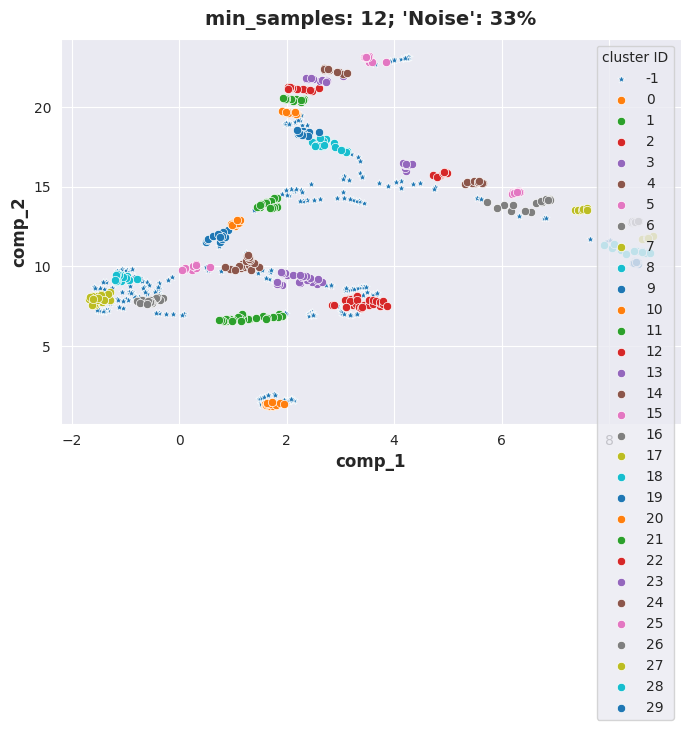

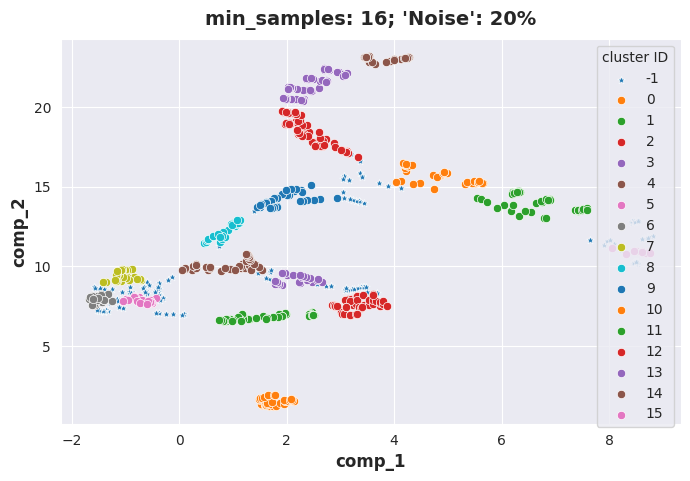

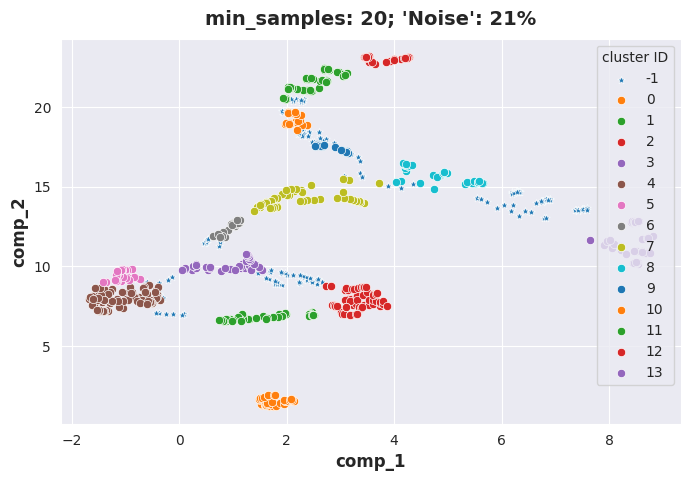

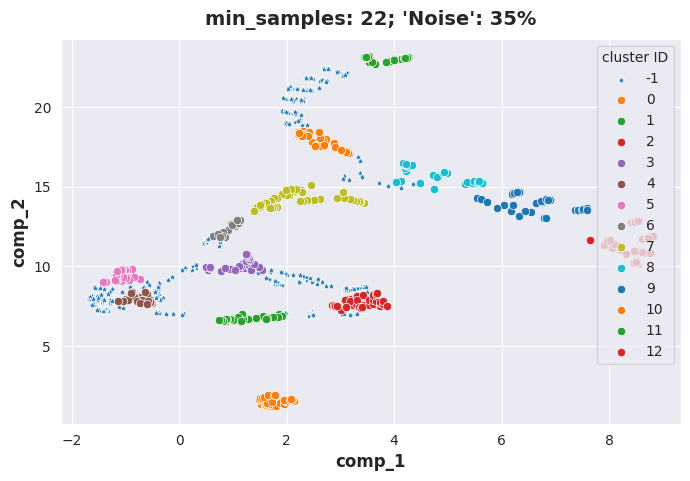

CPU times: user 20.9 s, sys: 3.88 s, total: 24.8 s
Wall time: 58.4 s


In [ ]:
%%time

for n_samples in [8, 12, 16, 20, 22]:

    optics = OPTICS(min_samples=n_samples, n_jobs=-1)

    labels_6 = optics.fit_predict(X)

    visualize_clusters(df=X, labels_all=labels_6, hyperparam_name=optics_hparam, hyperparam_val=n_samples, noise_exist=True)

Teniendo en cuenta que al aumento de n_samples el mejor resultado o punto central se ubica con 16 min_samples que elimina solo un 21% de los datos o ruido.
para buscar la idealidad de los 3 cluster se deben ajustar demas parametros para asegurarse de un buen rendimiento.

In [ ]:
%%time

n_samples = 16

start_time = time.time()

optics = OPTICS(min_samples=n_samples, n_jobs=-1)

labels_6 = optics.fit_predict(X)

training_times.append(time.time() - start_time)

CPU times: user 2.59 s, sys: 649 ms, total: 3.24 s
Wall time: 10.1 s


**Comparison of training times**

In [ ]:
print(training_times)

[0.0210416316986084, 2.7605438232421875, 0.09072685241699219, 4.858940362930298, 0.021672487258911133, 10.102368116378784]


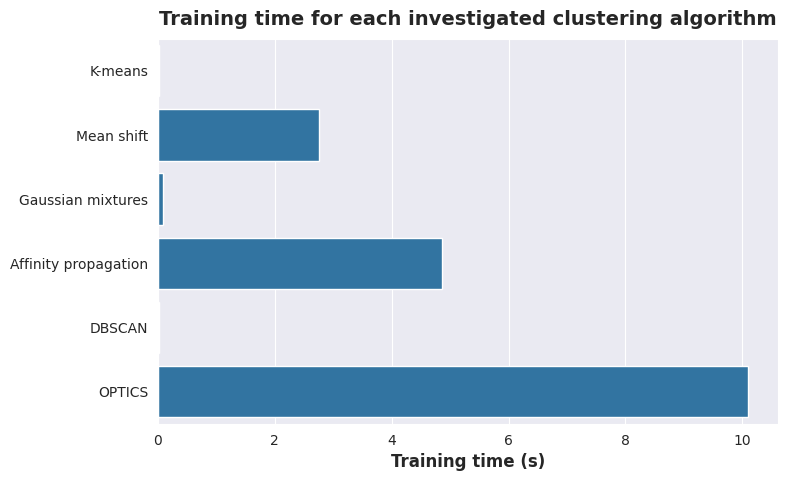

In [ ]:
plt.figure(figsize = std_figure_size)
sns.barplot(y= algos, x= training_times )
plt.title("Training time for each investigated clustering algorithm")
plt.xlabel("Training time (s)")
plt.show()

Los tiempos de entrenamiento entre los algoritmos varían considerablemente,para los algoritmos meanshift,affinity propagation,y OPTICS son superiores a Kmeans y gaussian mixtures y DBSCAN para este dataset.
Seguidamente se retira el algoirtmo con mayor tiempo de entremineto para visualizar el tiempo que corresponde a los algotimos con menor tiempo de entrenamiento.

Tiempos de entrenamiento de los algoritmos.

In [ ]:
training_times[1] = training_time_meanshift_noise
print(training_times)

[0.0210416316986084, 2.7955281734466553, 0.09072685241699219, 4.858940362930298, 0.021672487258911133, 10.102368116378784]


Se realiza la exclusión de los algoritmos con mayor tiempo de entrenamiento,para visualizar los algoritmos con menor tiempo de entrenamiento que no superan 1 segundo.

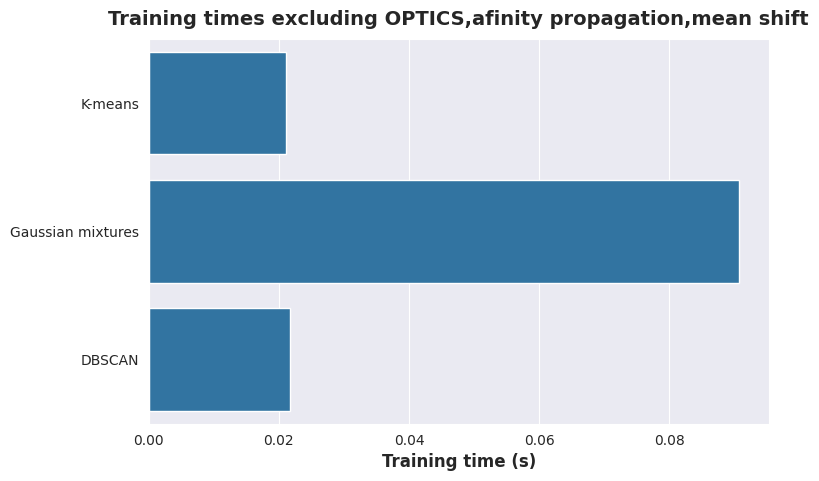

In [ ]:
# Selección de los datos para mostrar
data_train = [training_times[0], training_times[2], training_times[4]]
data_algos = [algos[0], algos[2], algos[4]]

plt.figure(figsize=std_figure_size)
sns.barplot(y=data_algos, x=data_train)
plt.title("Training times excluding OPTICS,afinity propagation,mean shift")
plt.xlabel("Training time (s)")
plt.show()


En la siguiente tabla se ilustrara la información que fue evaluada en el dataset usado "CrimesOnWomenData"

In [ ]:
from prettytable import PrettyTable

tabla = PrettyTable()
tabla.field_names = ["Algoritmo", "Training time(s)", "Cluster" ,"Noise(%)","Damping","Preference","Hiperparametros","eps"]
tabla.add_row(["K-means", 0.02104, 3, 0, 0, 0, 0, 0])
tabla.add_row(["Mean shift", 2.7955 , 3, 0, 0, 0, 0, 0])
tabla.add_row(["Gaussian mixtures", 0.09072, 3, 0, 0, 0, 0, 0])
tabla.add_row(["Affinity propagation", 4.8589, 14, 11, 0.5, 0, 0, 0])
tabla.add_row(["DBSCAN", 0.0216, 13, 0, 0, 0, 0, 0.6])
tabla.add_row(["OPTICS", 10.1023, 63, 22 , 0, 0, 0, 0])

print(tabla)

+----------------------+------------------+---------+----------+---------+------------+-----------------+-----+
|      Algoritmo       | Training time(s) | Cluster | Noise(%) | Damping | Preference | Hiperparametros | eps |
+----------------------+------------------+---------+----------+---------+------------+-----------------+-----+
|       K-means        |     0.02104      |    3    |    0     |    0    |     0      |        0        |  0  |
|      Mean shift      |      2.7955      |    3    |    0     |    0    |     0      |        0        |  0  |
|  Gaussian mixtures   |     0.09072      |    3    |    0     |    0    |     0      |        0        |  0  |
| Affinity propagation |      4.8589      |    14   |    11    |   0.5   |     0      |        0        |  0  |
|        DBSCAN        |      0.0216      |    13   |    0     |    0    |     0      |        0        | 0.6 |
|        OPTICS        |     10.1023      |    63   |    22    |    0    |     0      |        0        

**CONCLUSIÓN**



1.   Realizando el análisis del dataset, se tomo como referencia el
     metodo de elbow, K-means es la mejor opción.
1.   El algoritmo con mejor rendimiento,simplicidad,tiempo de
     entrenamiento para el dataset 'CrimesOnWomenData' es K-means.
2.   Al evaluar el conjunto de datos con diversos algoritmos de
     clustering, se observó que K-means, Gaussian mixtures y DBSCAN presentaron los tiempos de entrenamiento más cortos. No obstante, el algoritmo DBSCAN, configurado con un valor de eps=0.6, supero la cantidad de clusters optimos que mostro el metodo elbow.
2.   Para los parametros de ajuste de los algoritmos,se tomaron
     valores por default,se realizaron algunos ajustes para querer buscar un mejor rendimiento aun asi no se puedo establecer la relacion entre el metodo elbow y OPTICS,DBSACN,Afinnity Propagation.
1.   Los clusters obtenidos por el algoritmo K-means donde el
     cluster1 hace referencia a una alta incidencia en todos
     los tipos como el cluster1,el cluster2 representa la menor incidencia de los tipos de violencia y por ultimo,el cluster3 hace referencia a una mezcla de ambos cluster pero destaca por el incremento de casos de trafico de mujeres.





**REFERENCIAS**



*  dataset tomado de https://www.kaggle.com/code/pavankumar4757/crime-against-women-eda-and-prediction/input
*  clustering https://colab.research.google.com/drive/166viAUFuXd_MPPPu-VVagb811tkiEbxM
*  Video youtobe https://youtu.be/wAy500hF5QM





